# CE9010 Group Project - Group 2
*by Oh Bing Quan, Sharma Uday, Zhao Zhun* 

# Predicting Churning Credit Card Customers

## Table of Contents
1. [Introduction](#introduction) <br>
2. [Data Problem](#problem) <br>
3. [Data Acquisition](#acquisition) <br>
    3.1 [Kaggle API](#kaggle) <br>
    3.2 [Load Data File](#load) <br>
4. [Exploratory Data Analysis](#eda) <br>
    4.1 [Basic Information](#basic) <br>
    4.2 [Univariate Plots](#uni) <br>
    4.3 [Bivariate Plots](#bi) <br>
    4.4 [Multivariate Plots](#multi) <br>
5. [Data Preprocessing](#pre) <br>
    5.1 [Label Encoding](#enc) <br>
    5.2 [Data Scaling and Normalization](#dsn) <br>
6. [Data Analysis](#da) <br>
    6.1 [Model Selection](#ms) <br>
    6.2 [Evaluation Metrics](#em) <br>
    6.3 [Hyperparameter Tuning and Model Training](#ht) <br>
    6.4 [Evaluation](#ev) <br>
    6.5 [Summary of Results](#sum) <br>
7. [Considerations for Improvement](#fut) <br>
8. [References](#ref) <br>

## 1. Introduction <a id="introduction"></a>

This project is done in fulfillment of the module requirements for CE9010: Introduction to Data Analysis. We use different supervised machine learning models to predict credit card churner based on a public data set available on Kaggle, and find out the most suitable model for this problem based on evaluation metrics. 

This project has been done through collaboration on GitHub, and is hosted at https://github.com/uday-31/CE9010-project-group-2.

The following libraries were used:
* numpy
* pandas
* datetime
* seaborn
* matplotlib
* collections
* scikit-learn
* xgboost
* math
* warnings

In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

# visualization library
%matplotlib notebook 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider #for dynamic visualization
from matplotlib.animation import FuncAnimation

#Misc
from collections import Counter

# scikit-learn library
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score, precision_score, roc_curve, log_loss
from sklearn.metrics import f1_score, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import math

# remove warning
import warnings
warnings.filterwarnings("ignore")

Here is a flowchart of the project:

![SegmentLocal](data/flowchart.png "segment")

## 2. Data Problem <a id='problem'></a>

Credit card churning is the practice of repeatedly opening and closing credit cards to earn cash, rewards points or miles. Often, you can qualify for a large intro bonus after opening a new credit card, which is something "churners" exploit to try to amass a lot of rewards. However, credit card companies may view the practice as gaming the system and take steps to prevent it. [[1]](#one)

The dataset consists of information on credit card customers, along with information on whether their account is closed or not, which can be used to identify churners. Machine Learning models can be employed to learn which customers are likely to churn, so the banks can go to the customer to provide them with better services to prevent churning.

## 3. Data Acquisition <a id='acquisition'></a>

### 3.1 Kaggle API <a id='kaggle'></a>
The dataset used for this project is a public dataset available on [Kaggle](https://www.kaggle.com/sakshigoyal7/credit-card-customers). 

The dataset is downloaded using the Kaggle API. The json file for authenticating the Kaggle account has been removed from the GitHub repository for privacy purposes.

In [1]:
# #!pip install kaggle
# import json

# !kaggle datasets download sakshigoyal7/credit-card-customers -f BankChurners.csv -p data


  0%|          | 0.00/379k [00:00<?, ?B/s]
100%|##########| 379k/379k [00:00<00:00, 22.1MB/s]


### 3.2 Load Data File <a id='load'></a>

We use pandas as the dataframe library to handle the dataset. 
As specified by the uploader of the dataset, there are two features in the raw dataset that are included by error. These features are first dropped.

In [2]:
data = pd.read_csv('data/BankChurners.csv.zip')
data = data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)

## 4. Exploratory Data Analysis <a id='eda'></a>

We start off with an Explanatory Data Analysis (EDA) of the dataset we are using. We would like to investigate the distribution as well as the correlation of the variables. 

### 4.1 Basic Information <a id='basic'></a>

First, we use `info()` from the Pandas library to get an idea about the shape of the data.

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

The dataset has 10,127 entries with 21 features. 

* *Attrition_Flag* is the target feature, which tells us whether the credit card account is closed or not. 
* *CLIENTNUM* is a unique numerical ID given to each customer and thus will not have any predictive power.
* There are no null values in the dataset. There are 10 integer data types, 5 float data types and 6 object data types.
* The other features are either objects or numbers, and need to be explored further. They describe various characteristics of the credit card accounts.

We study each feature with the "object" Dtype in order to understand them further.

In [4]:
print("Attrition_Flag :",data["Attrition_Flag"].unique())
print("Gender         :",data["Gender"].unique())
print("Education_Level:",data["Education_Level"].unique())
print("Marital_Status :",data["Marital_Status"].unique())
print("Income_Category:",data["Income_Category"].unique())
print("Card_Category  :",data["Card_Category"].unique())

Attrition_Flag : ['Existing Customer' 'Attrited Customer']
Gender         : ['M' 'F']
Education_Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status : ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category  : ['Blue' 'Gold' 'Silver' 'Platinum']


We use `head()` to take a look at a small sample of the data.

In [7]:
data.head(n=5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

We then look at the descriptive statistics of the data.

In [8]:
data.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

Now, we have a better idea about each feature. They are described in the table below:

|Feature|Values|Description|
|----------|-------|----|
|*CLIENTNUM*|unique integers|ID of the client|
|*Attrition_Flag*|"Existing Customer", "Attrited Customer"|Describe whether the client has closed their account|
|*Customer_Age*|25-73|Age|
|*Gender*|"M" or "F"|Gender|
|*Dependent_count*|0-5|Number of dependents|
|*Education_Level*|'High School', 'Graduate', 'Uneducated', 'Unknown', 'College','Post-Graduate','Doctorate'|Education level|
|*Marital_Status*|"Single","Married","Unknown","Divorced"|Marital status|
|*Income_Category*|"\$60K - \$80K", 'Less than \$40K', '\$80K - \$120K', '\$40K - \$60K', '\$120K +', 'Unknown'|Income range|
|*Card_Category*|"Blue", "Gold", "Silver", "Platinum"|Tier of the card|
|*Months_on_book*|13-40|Period of relationship with bank|
|*Total_Relationship_Count*|1-6|Total number of products held by the customer|
|*Months_Inactive_12_mon*|0-6|Number of months inactive in the last 12 months|
|*Contacts_Count_12_mon*|0-6|Number of contacts in the last 12 months|
|*Credit_Limit*|1438.3-34516|Credit limit on the credit card|
|*Total_Revolving_Bal*|0-2517|Total Revolving Balance on the Credit Card|
|*Avg_Open_To_Buy*|3-34516|Open to Buy Credit Line (Average of last 12 months)|
|*Total_Amt_Chng_Q4_Q1*|0-3.397|Change in Transaction Amount (Q4 over Q1)|
|*Total_Trans_Amt*|510-18484|Total Transaction Amount (Last 12 months)|
|*Total_Trans_Ct*|10-139|Total Transaction Count (Last 12 months)|
|*Total_Ct_Chng_Q4_Q1*|0-3.714|Change in Transaction Count (Q4 over Q1)|
|*Avg_Utilization_Ratio*|0-0.999|Average Card Utilization Ratio|

### 4.2 Univariate Plots <a id='uni'></a>

We plot each feature to study their distributions.

#### 4.2.1 Attrition Flag

This is the target feature, and it tells us whether the client has closed their account or not.

<IPython.core.display.Javascript object>


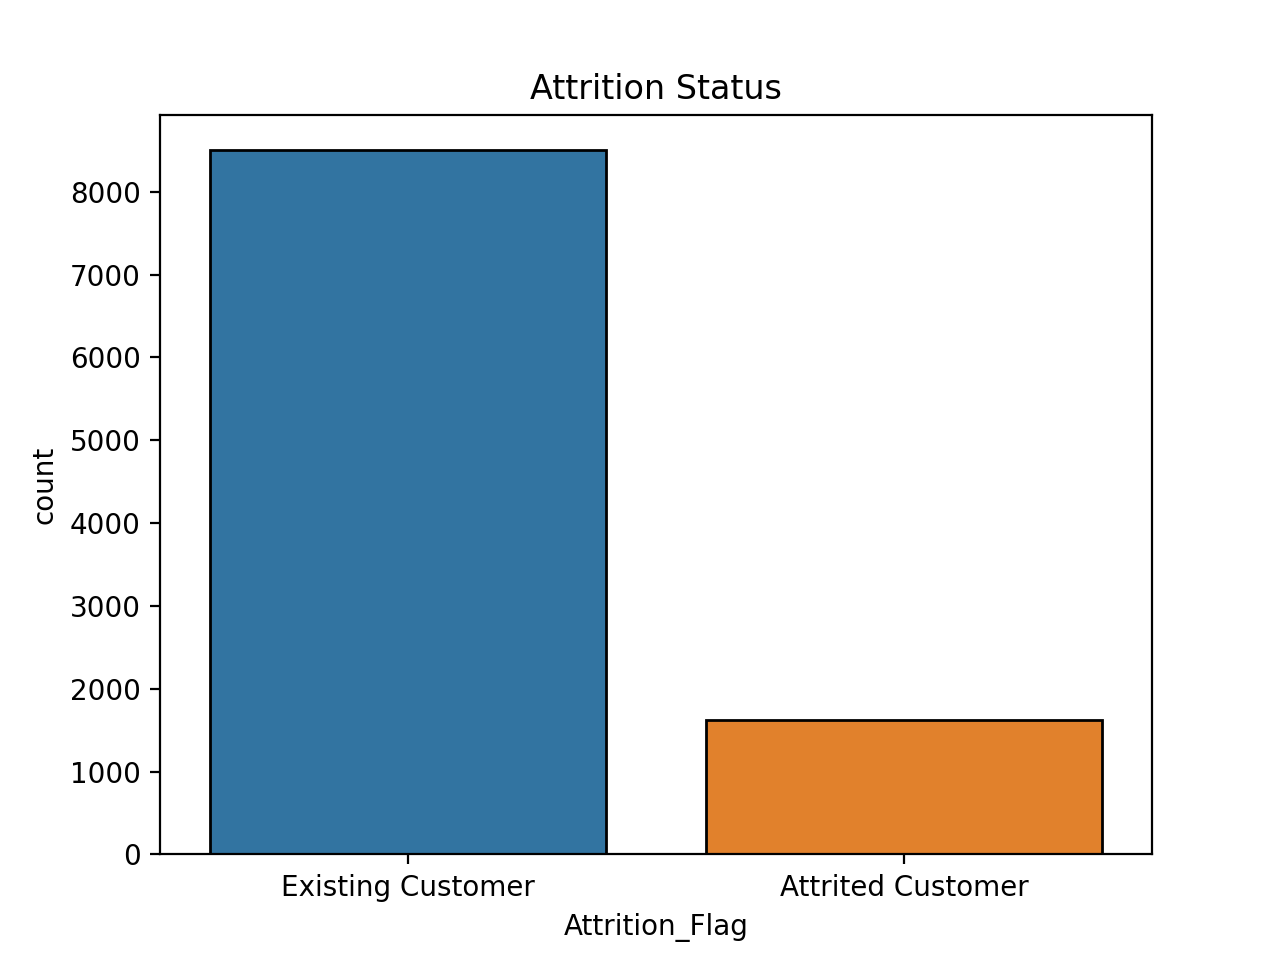

In [53]:
plt.figure(1)
plt.title("Attrition Status")
sns.countplot(data['Attrition_Flag'],edgecolor = 'black')
plt.show()

The plot shows that we are dealing with a significantly unbalanced dataset. Only a small proportion of the customers have churned.

#### 4.2.2 Gender, Education Level, Marital Status, Income Category, and Card Category

These are the categorical features. We plot a bar chart for each feature to study the distribution.

<IPython.core.display.Javascript object>


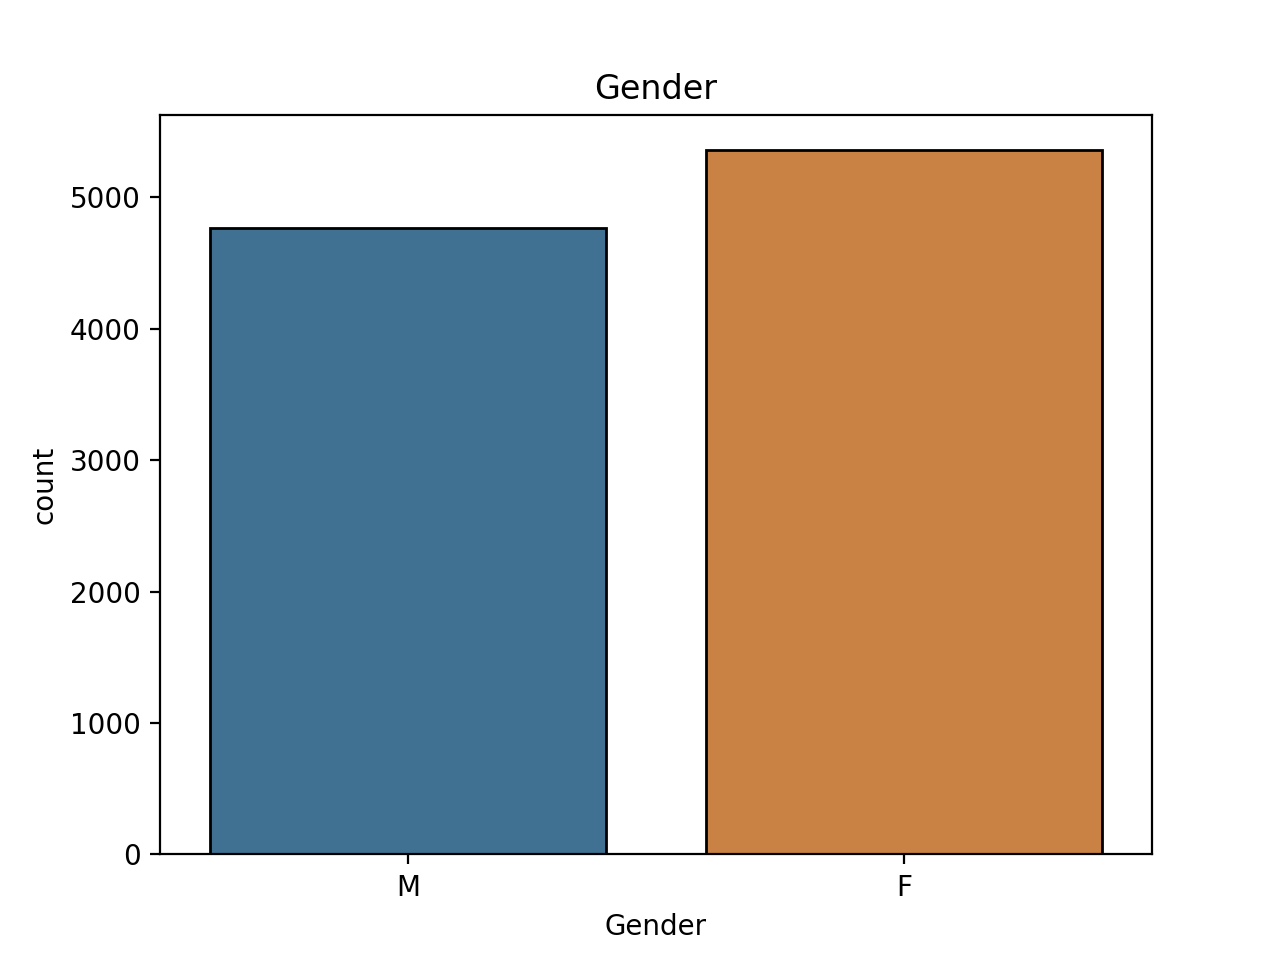

In [54]:
plt.figure(2)
plt.title("Gender")
sns.countplot(data['Gender'],edgecolor = 'black',saturation = 0.55)
plt.show()

<IPython.core.display.Javascript object>


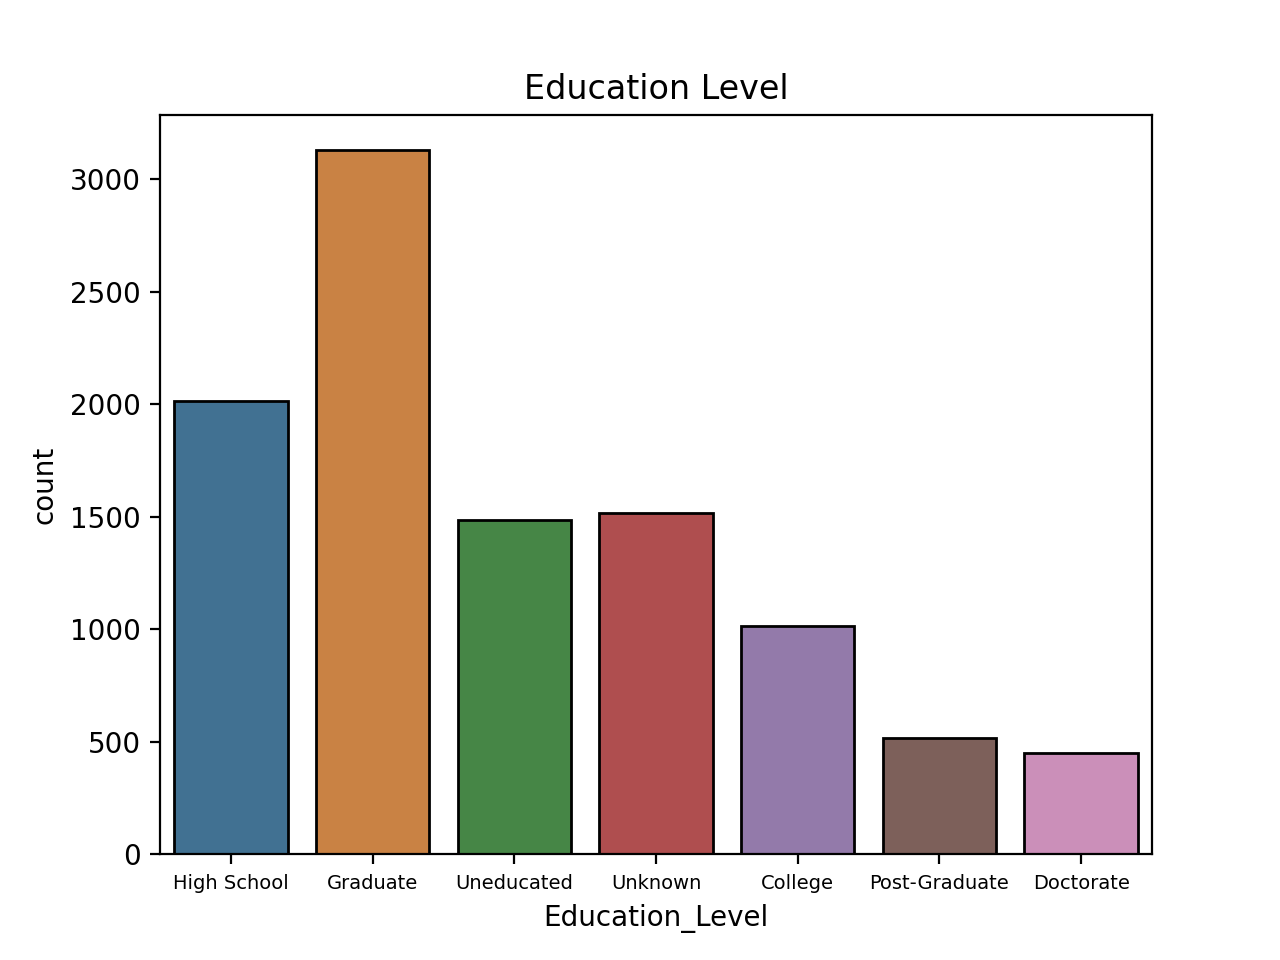

In [17]:
plt.figure(3)
plt.title("Education Level")
fig3 = sns.countplot(data['Education_Level'],edgecolor = 'black',saturation = 0.55)
fig3.set_xticklabels(fig3.get_xticklabels(),fontsize=7)
plt.show()

<IPython.core.display.Javascript object>


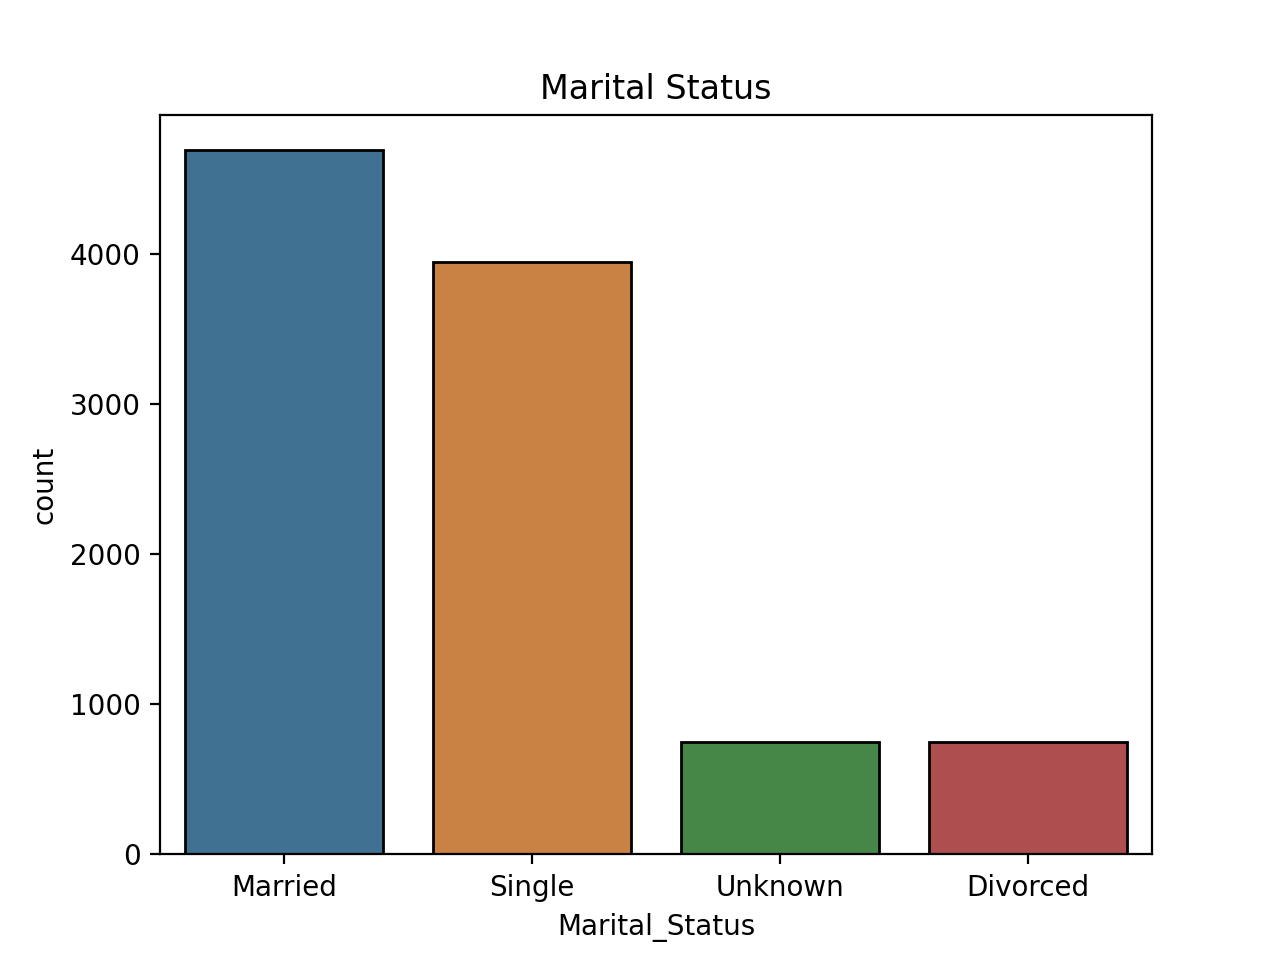

In [56]:
plt.figure(4)
plt.title("Marital Status")
sns.countplot(data['Marital_Status'],edgecolor = 'black',saturation = 0.55)
plt.show()

<IPython.core.display.Javascript object>


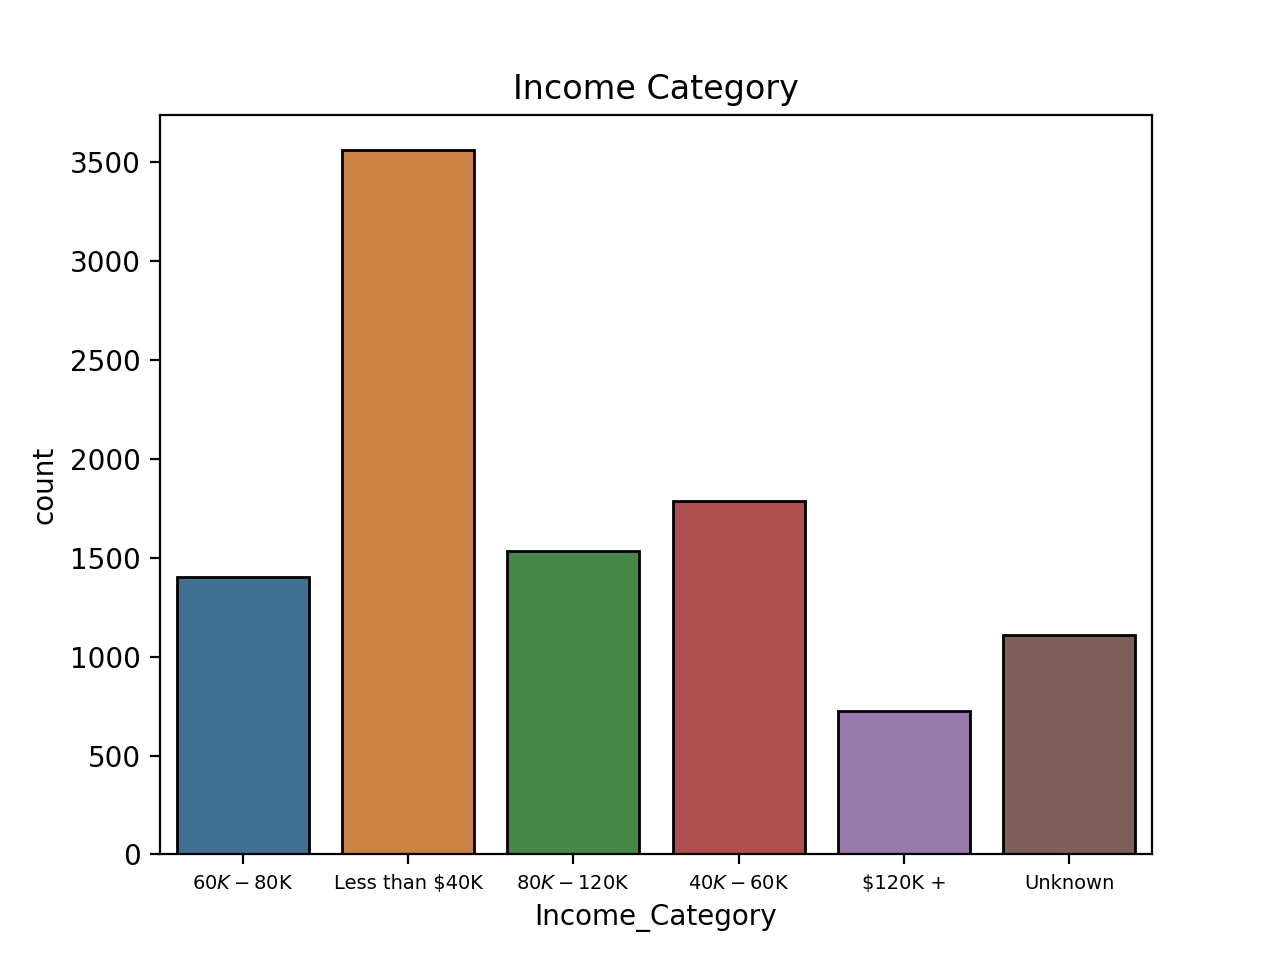

In [19]:
plt.figure(5)
plt.title("Income Category")
fig5 = sns.countplot(data['Income_Category'],edgecolor = 'black',saturation = 0.55)
fig5.set_xticklabels(fig5.get_xticklabels(),fontsize=7)
plt.show()

<IPython.core.display.Javascript object>


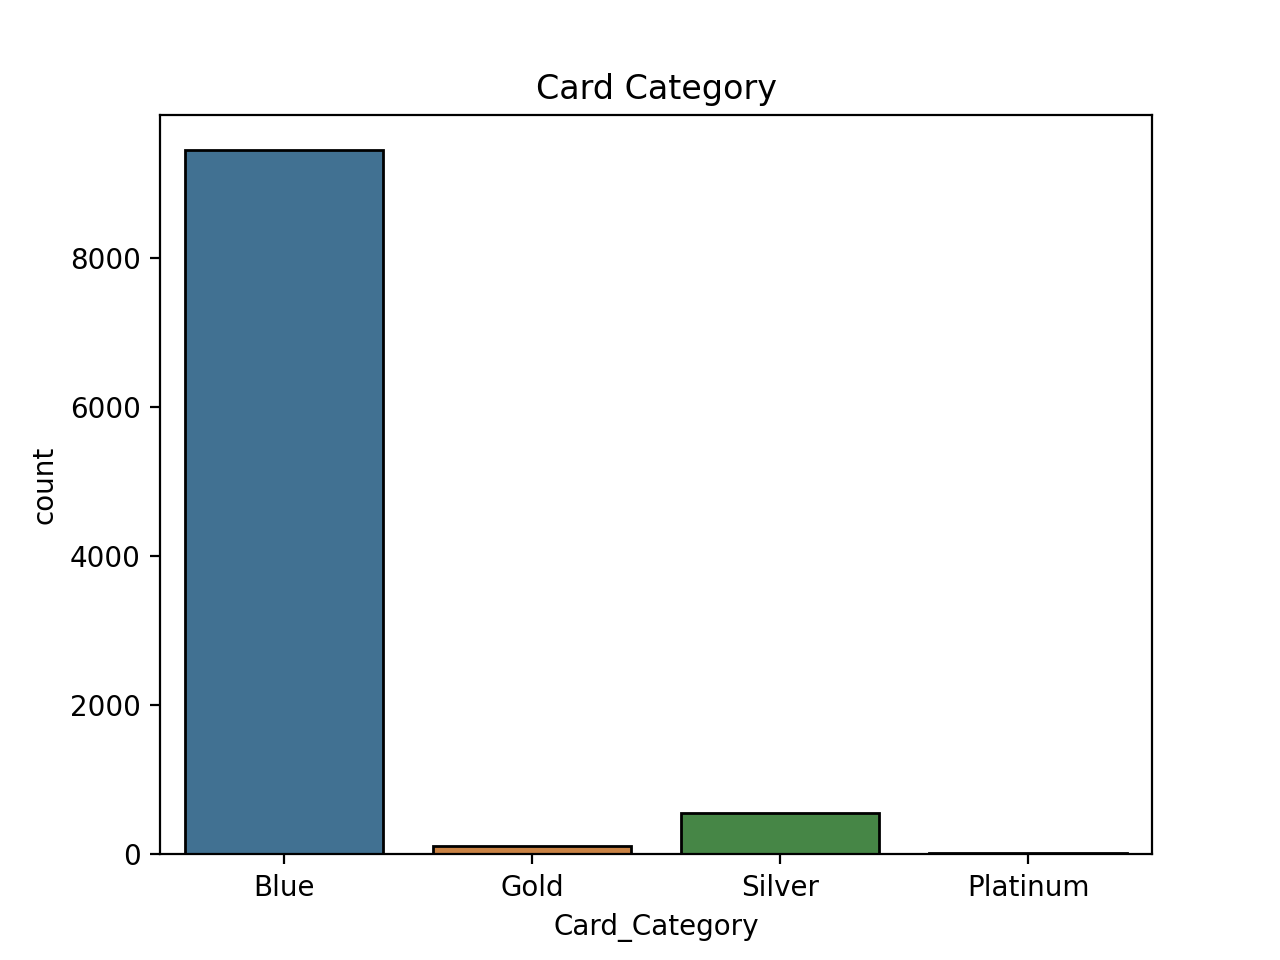

In [58]:
plt.figure(6)
plt.title("Card Category")
sns.countplot(data['Card_Category'],edgecolor = 'black',saturation = 0.55)
plt.show()

We have the following observations:
* The dataset is almost evenly distributed amongst males and females.
* Almost half of the customers are married.
* The most common income category is "Less than $40K".
* Around 90% of the customers are at the Blue tier of the credit card. 

#### 4.2.3 No. of Dependents, Months on Book, Total Relationship Count, Months Inactive, and Contract Count

These are the integer value features with a small range, and can be visualized using a histogram rather than a distribution plot.

<IPython.core.display.Javascript object>


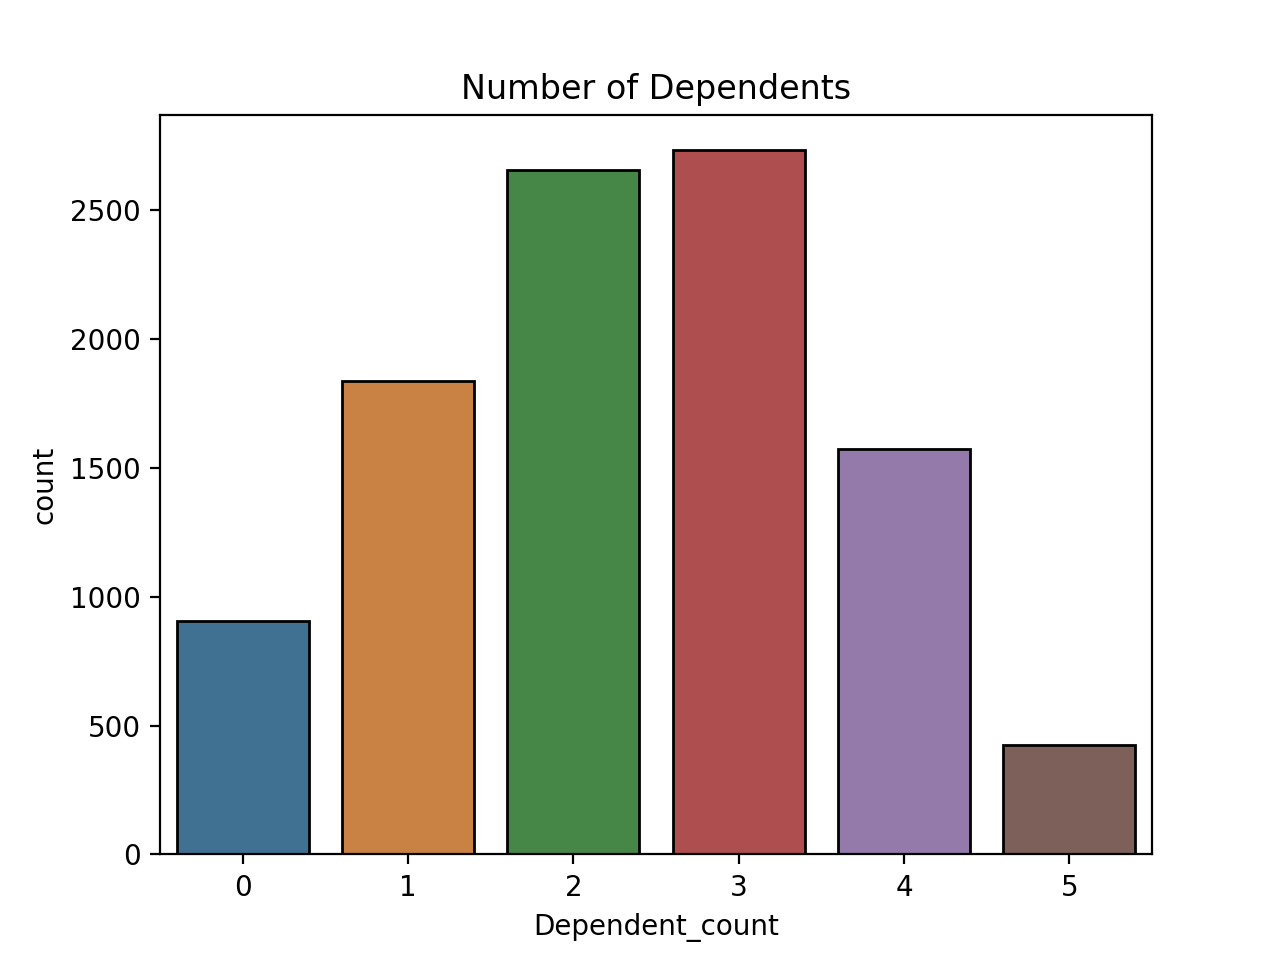

In [59]:
plt.figure(7)
plt.title('Number of Dependents')
sns.countplot(data['Dependent_count'],edgecolor = 'black',saturation = 0.55)
plt.show()

<IPython.core.display.Javascript object>


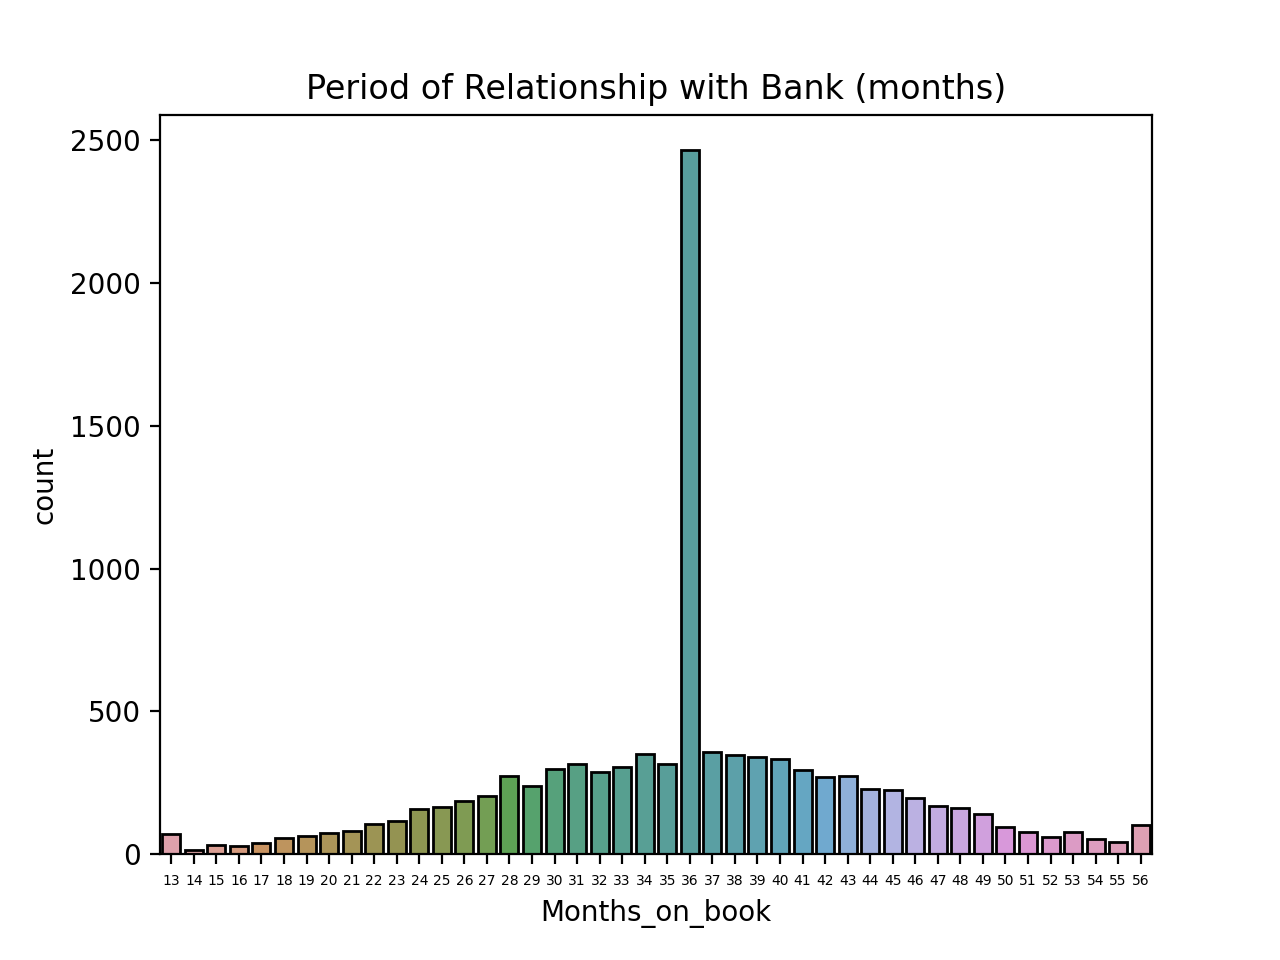

In [25]:
plt.figure(8)
plt.title('Period of Relationship with Bank (months)')
fig8 = sns.countplot(data['Months_on_book'],edgecolor = 'black',saturation = 0.55)
fig8.set_xticklabels(fig8.get_xticklabels(),fontsize=5)
plt.show()

From the histogram, we can see a spike at 36 months.

<IPython.core.display.Javascript object>


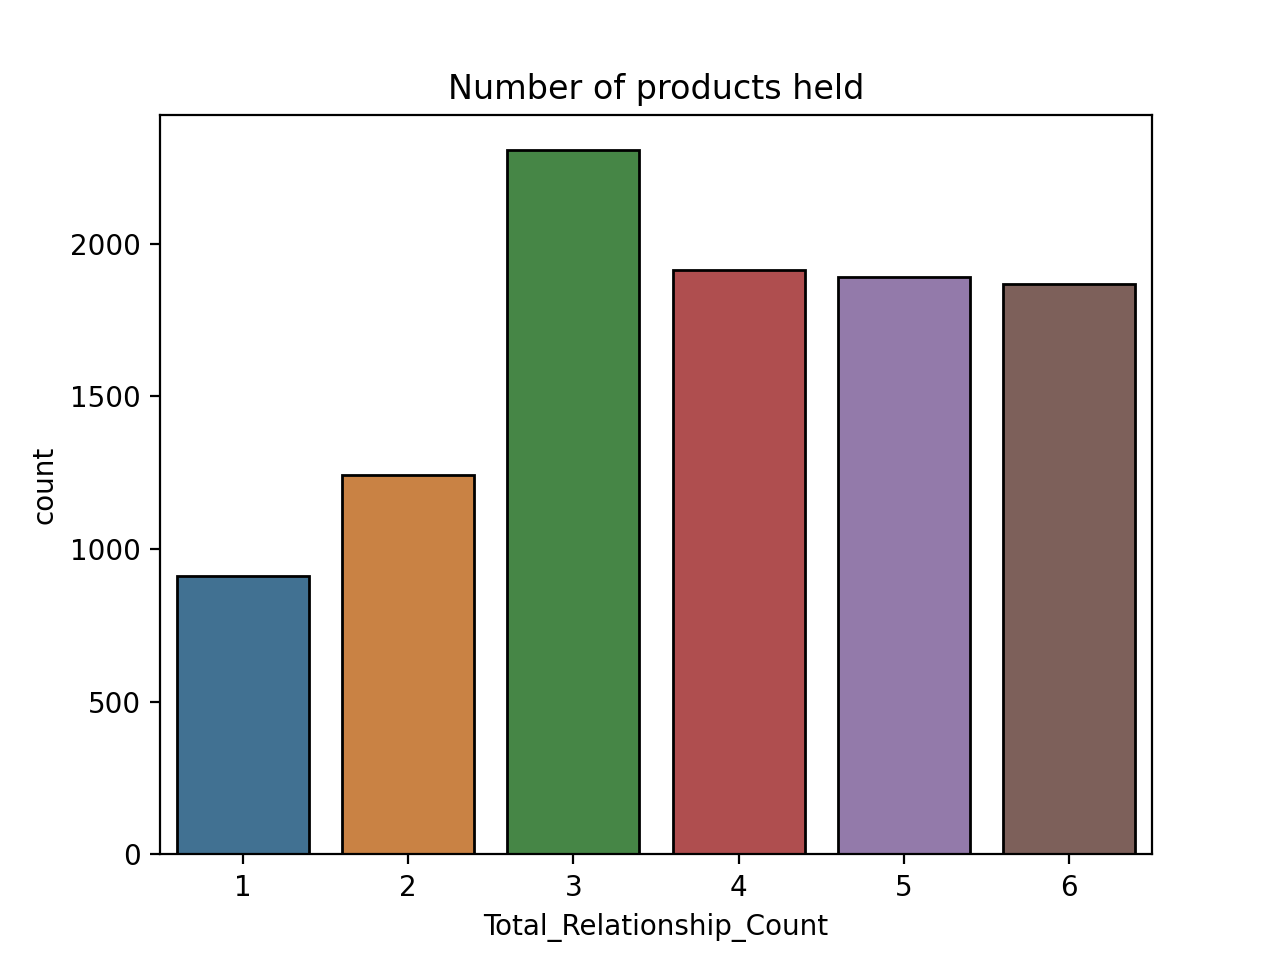

In [61]:
plt.figure(9)
plt.title('Number of products held')
sns.countplot(data['Total_Relationship_Count'],edgecolor = 'black',saturation = 0.55)
plt.show()

<IPython.core.display.Javascript object>


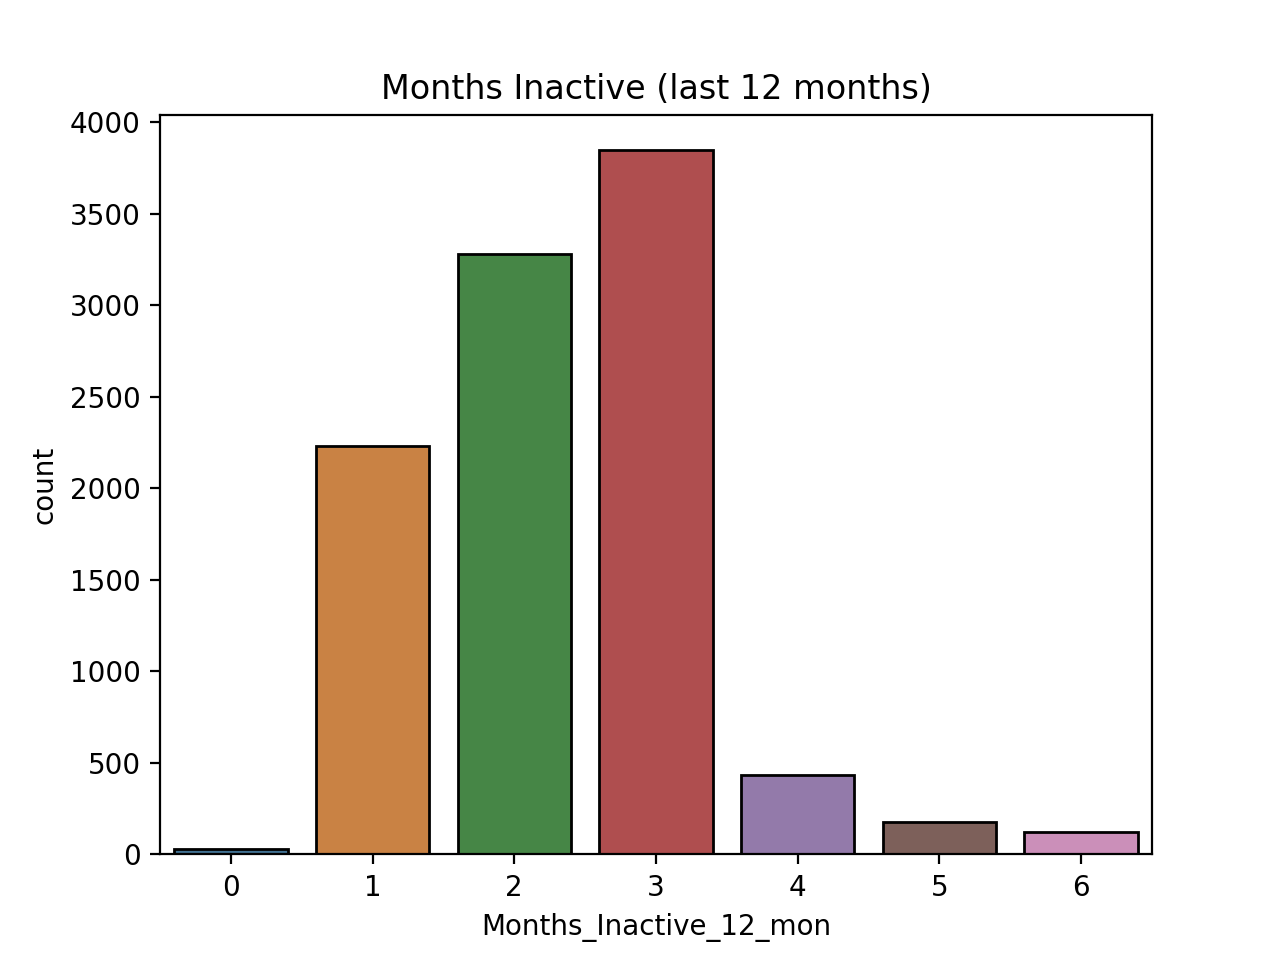

In [62]:
plt.figure(10)
plt.title('Months Inactive (last 12 months)')
sns.countplot(data['Months_Inactive_12_mon'],edgecolor = 'black',saturation = 0.55)
plt.show()

<IPython.core.display.Javascript object>


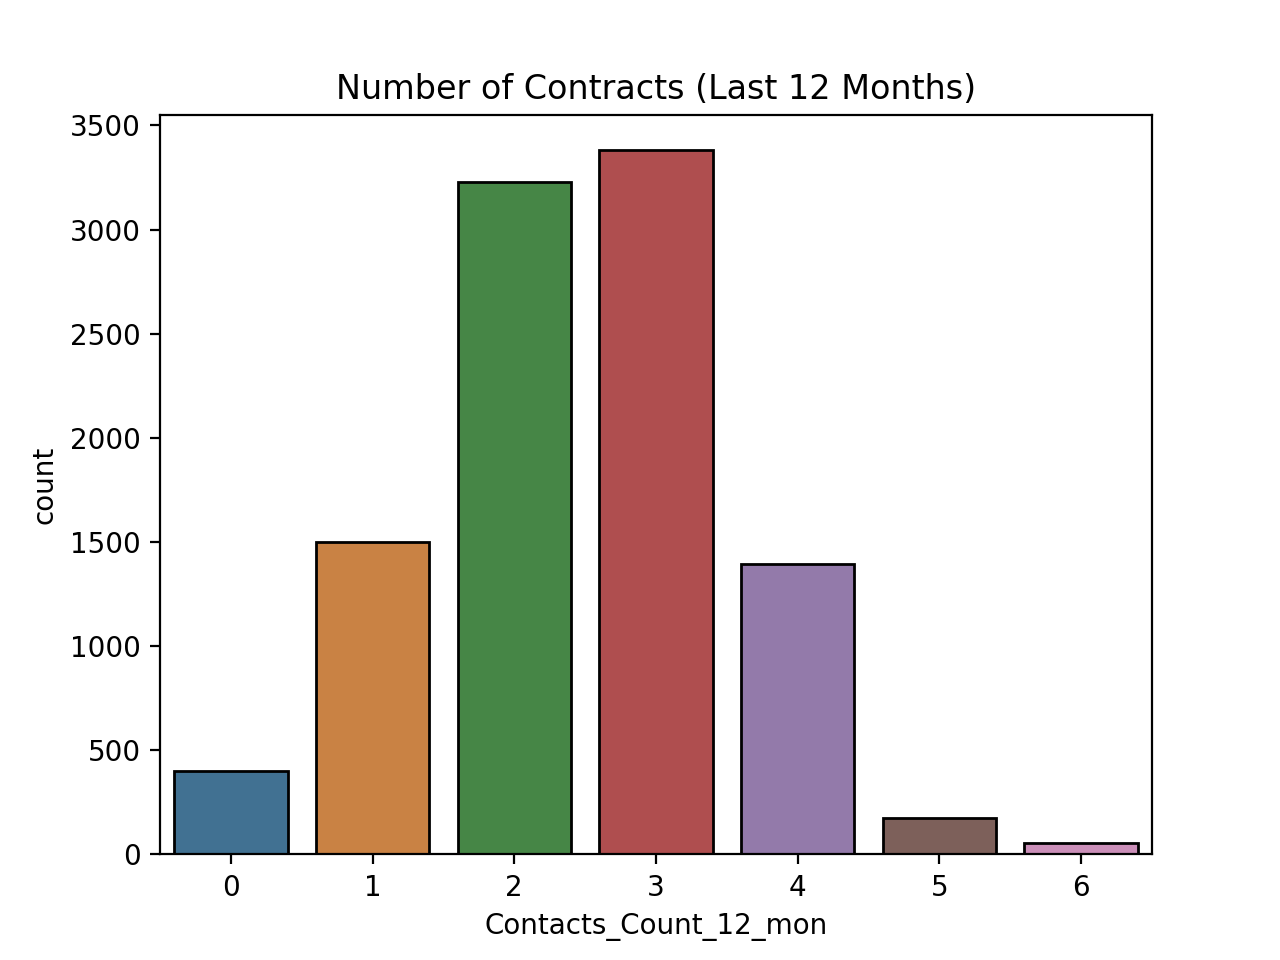

In [63]:
plt.figure(11)
plt.title('Number of Contracts (Last 12 Months)')
sns.countplot(data['Contacts_Count_12_mon'],edgecolor = 'black',saturation = 0.55)
plt.show()

We have the following observations:
* A majority of the customers have either 2 or 3 dependents.
* Most customers have exactly a 36-month, i.e., 3 year relationship with the bank. This is an outlier value, that may have occured as 3 years is a rounded figure, and most customers willing to end their relationship with the bank around that time tend to round it to 3 years.
* Most customers hold 3 or more products.
* Almost all of the customers have been inactive for only 3 months or fewer in the past 12 months.
* Most customers hold 3 or fewer contracts in the past 12 months.

#### 4.2.4 Remaining Features

The following features are plotted:

|Feature|Values|Description|
|----------|-------|----|
|*Customer_Age*|25-73|Age|
|*Credit_Limit*|1438.3-34516|Credit limit on the credit card|
|*Total_Revolving_Bal*|0-2517|Total Revolving Balance on the Credit Card|
|*Avg_Open_To_Buy*|3-34516|Open to Buy Credit Line (Average of last 12 months)|
|*Total_Amt_Chng_Q4_Q1*|0-3.397|Change in Transaction Amount (Q4 over Q1)|
|*Total_Trans_Amt*|510-18484|Total Transaction Amount (Last 12 months)|
|*Total_Trans_Ct*|10-139|Total Transaction Count (Last 12 months)|
|*Total_Ct_Chng_Q4_Q1*|0-3.714|Change in Transaction Count (Q4 over Q1)|
|*Avg_Utilization_Ratio*|0-0.999|Average Card Utilization Ratio|

We study the distribution plots, as these features have a huge range of values and are prone to outliers.

<IPython.core.display.Javascript object>


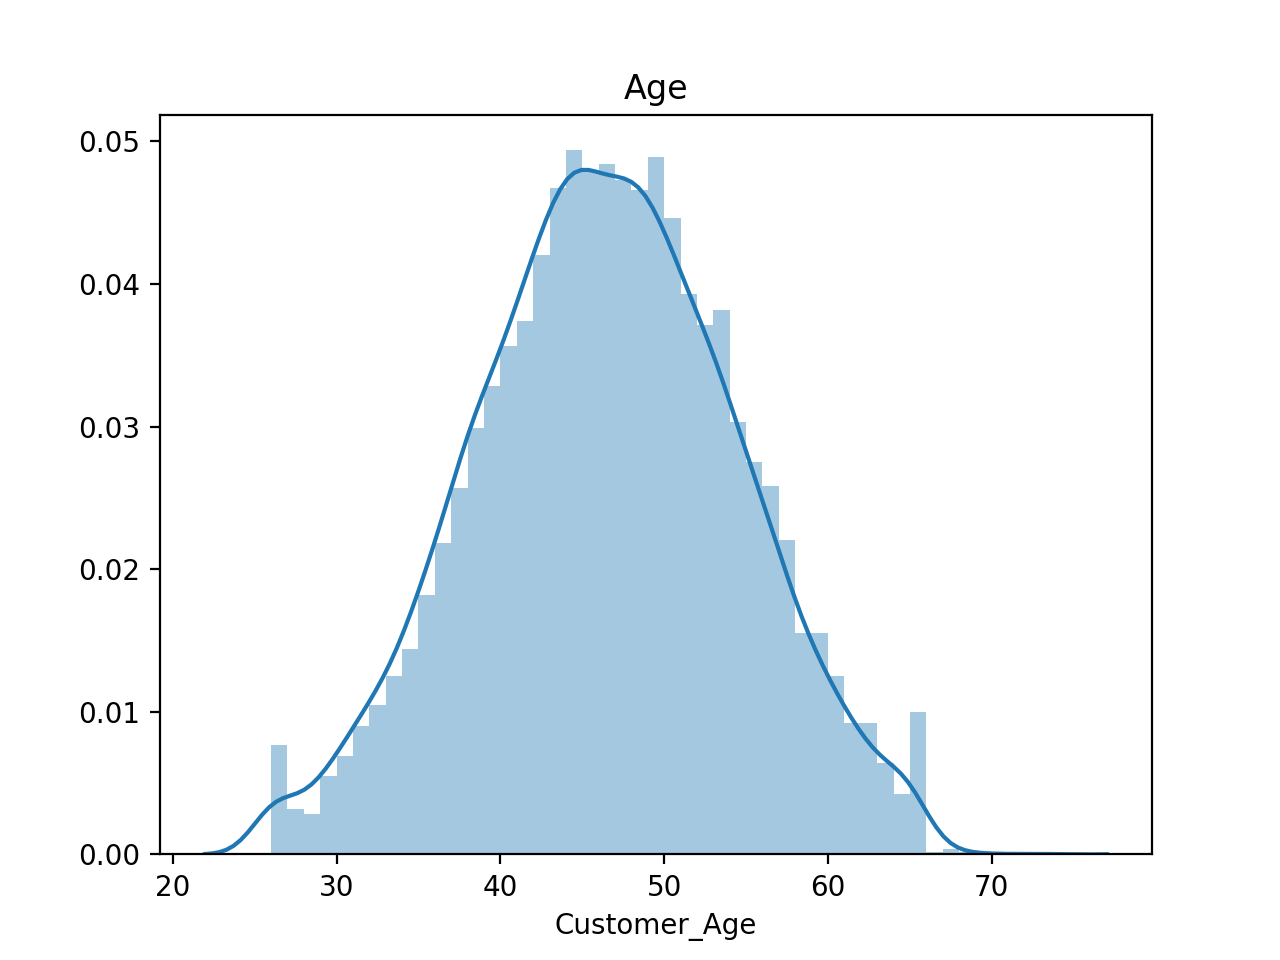

In [64]:
plt.figure(12)
plt.title('Age')
sns.distplot(data['Customer_Age'])
plt.show()

<IPython.core.display.Javascript object>


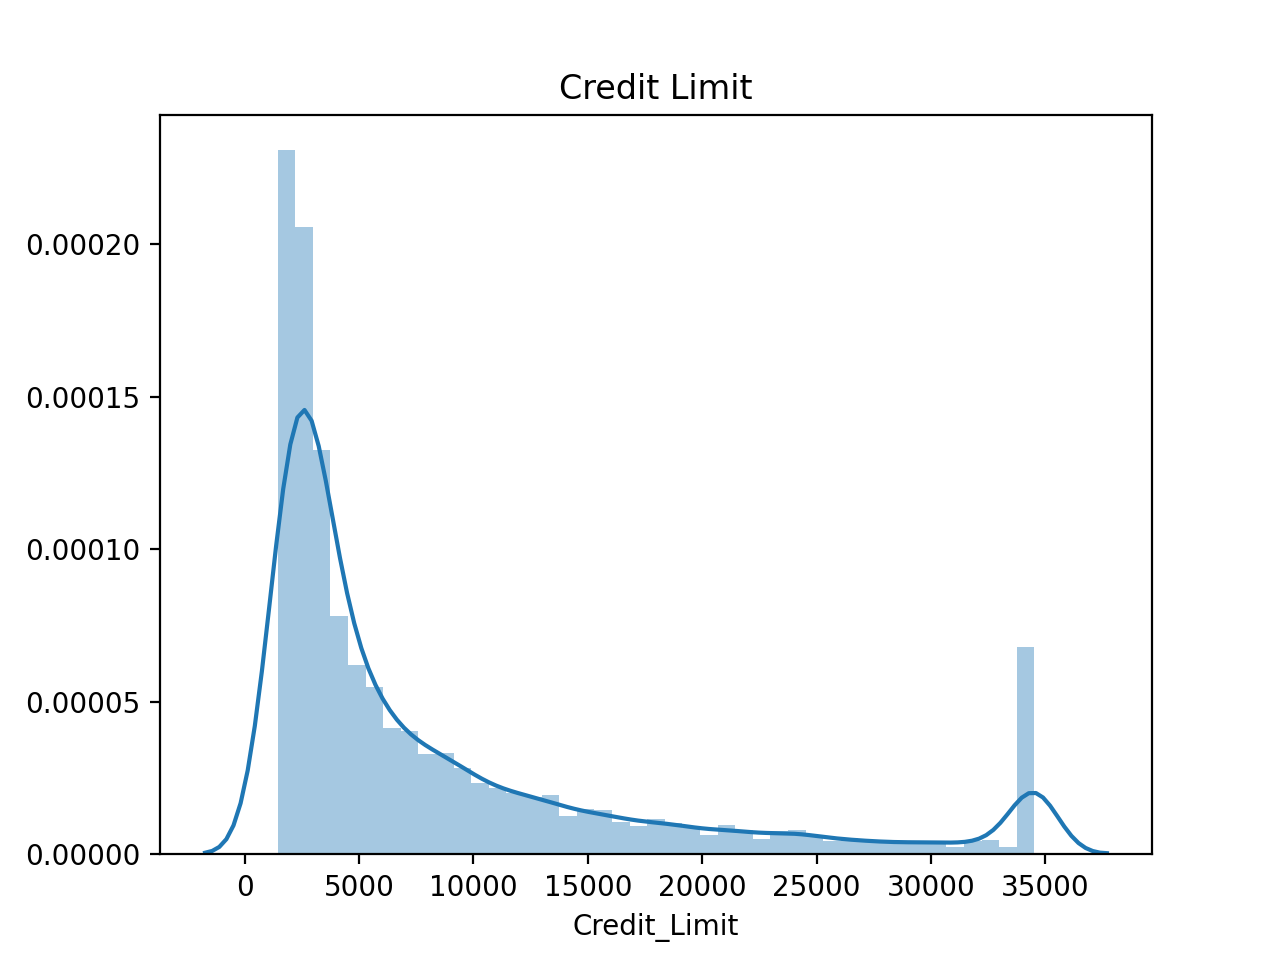

In [65]:
plt.figure(13)
plt.title('Credit Limit')
sns.distplot(data['Credit_Limit'])
plt.show()

<IPython.core.display.Javascript object>


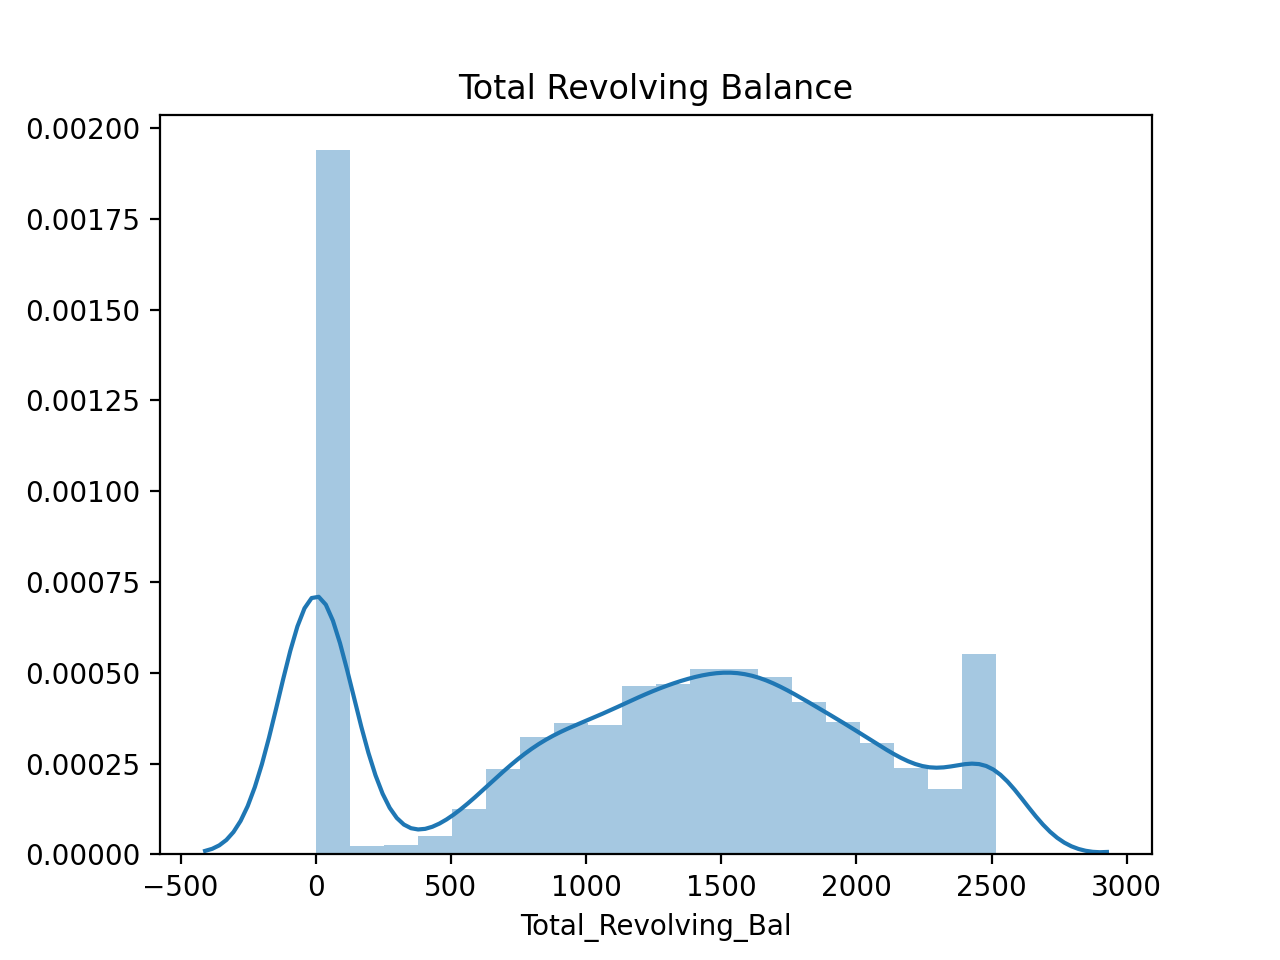

In [66]:
plt.figure(14)
plt.title('Total Revolving Balance')
sns.distplot(data['Total_Revolving_Bal'])
plt.show()

<IPython.core.display.Javascript object>


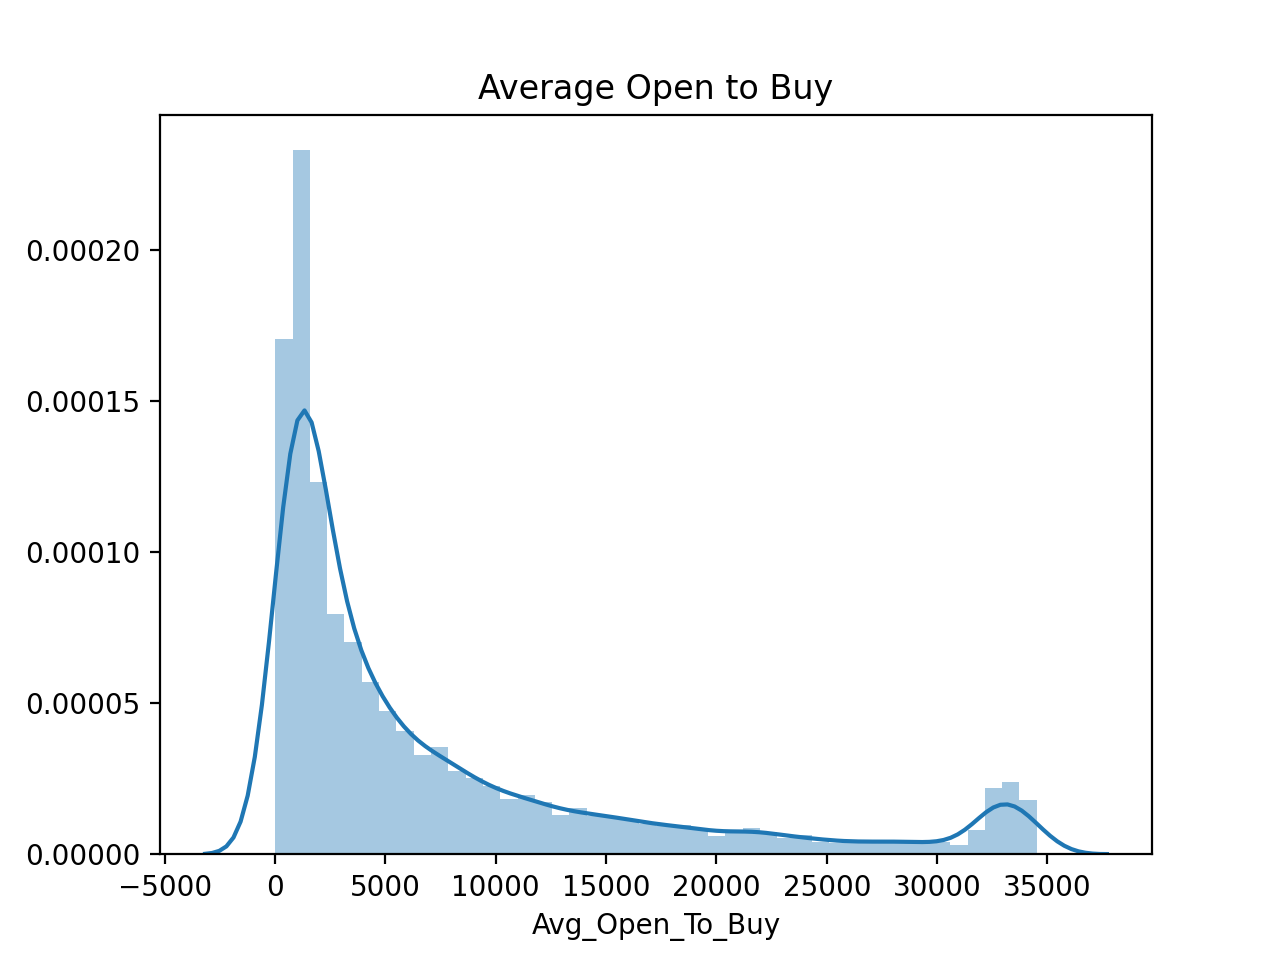

In [169]:
plt.figure(15)
plt.title('Average Open to Buy')
sns.distplot(data['Avg_Open_To_Buy'])
plt.show()

<IPython.core.display.Javascript object>


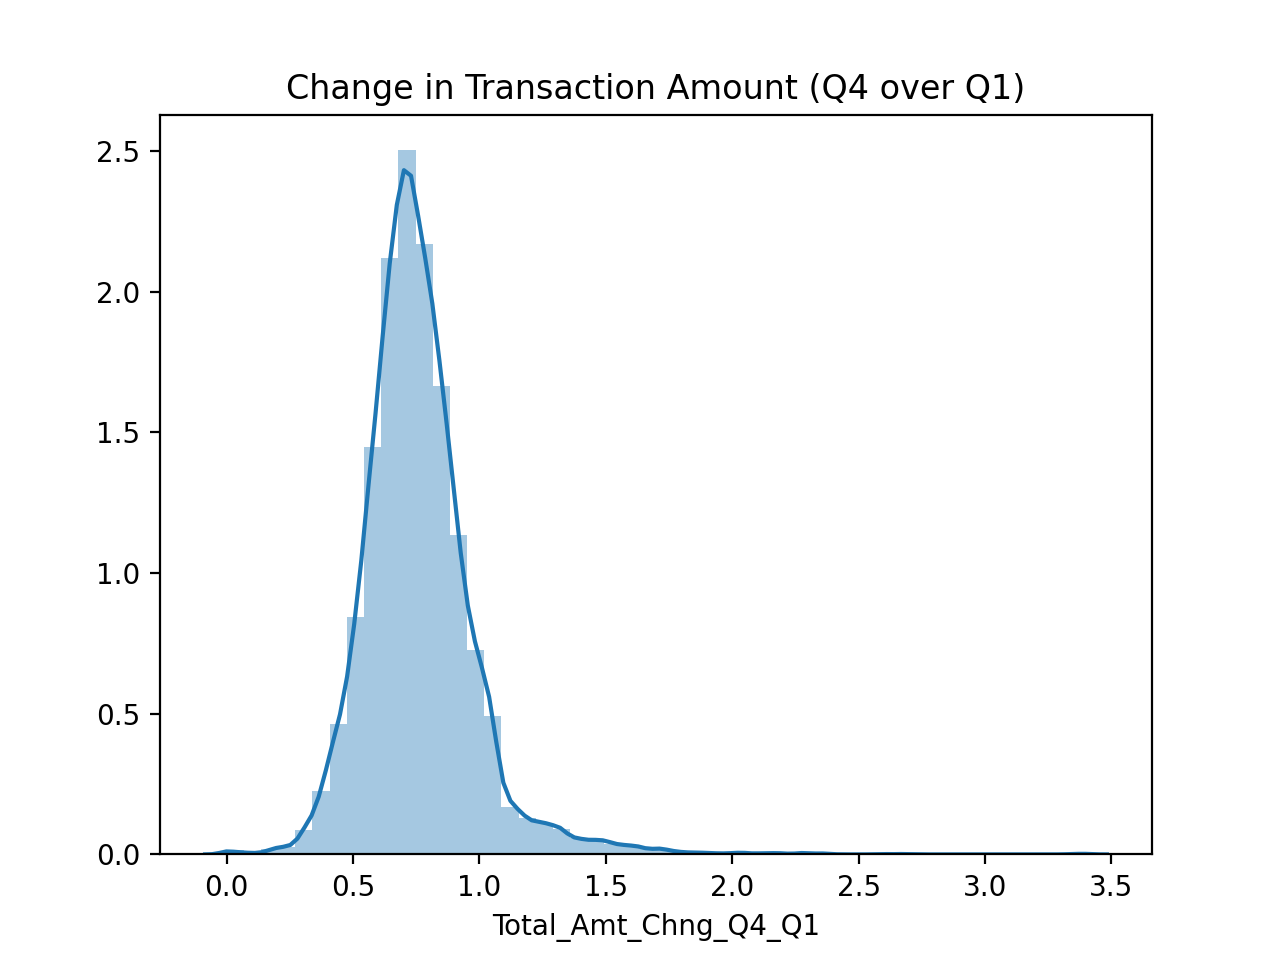

In [68]:
plt.figure(16)
plt.title('Change in Transaction Amount (Q4 over Q1)')
sns.distplot(data['Total_Amt_Chng_Q4_Q1'])
plt.show()

<IPython.core.display.Javascript object>


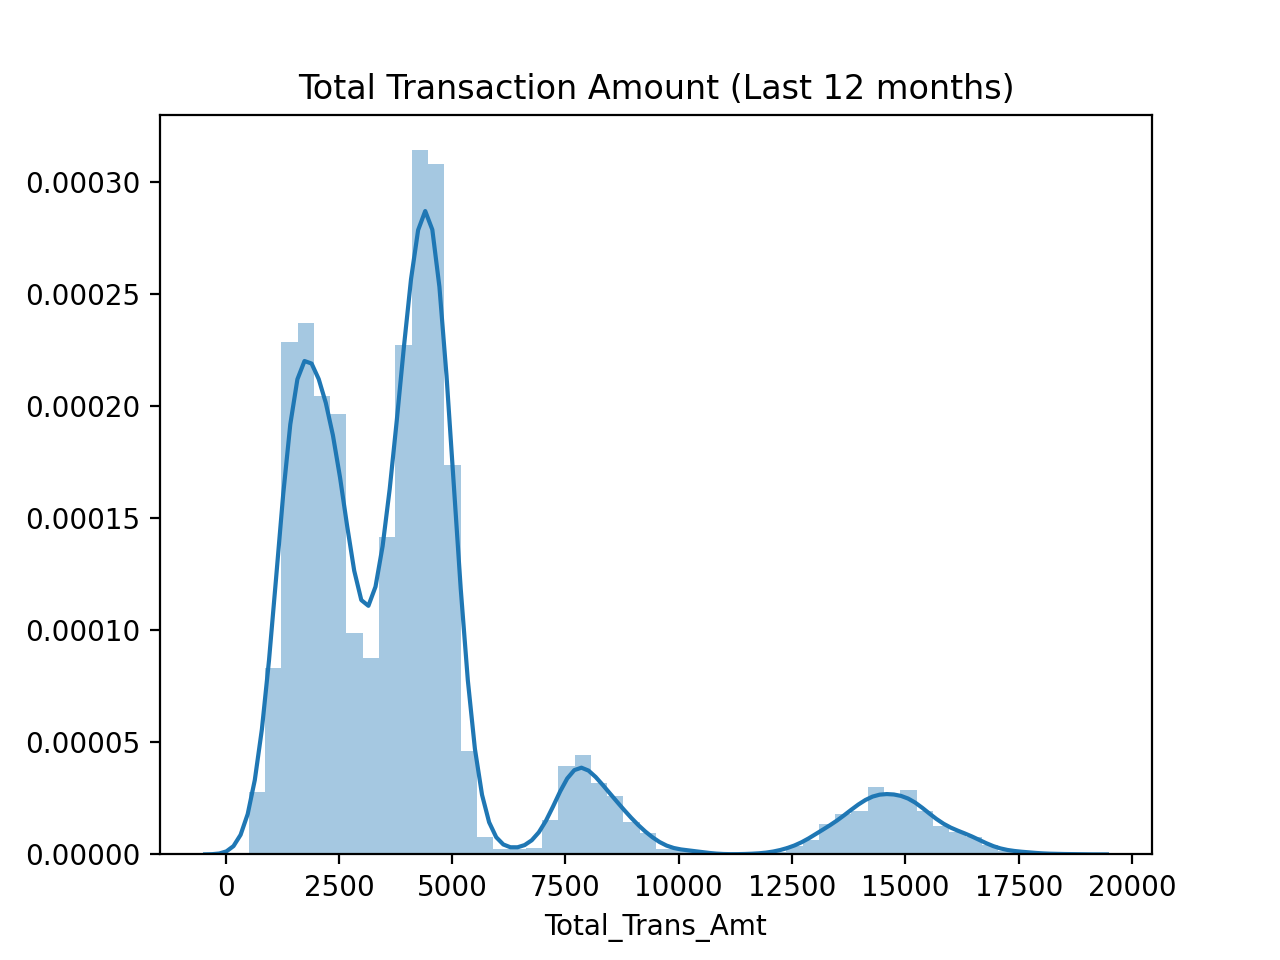

In [69]:
plt.figure(17)
plt.title('Total Transaction Amount (Last 12 months)')
sns.distplot(data['Total_Trans_Amt'])
plt.show()

<IPython.core.display.Javascript object>


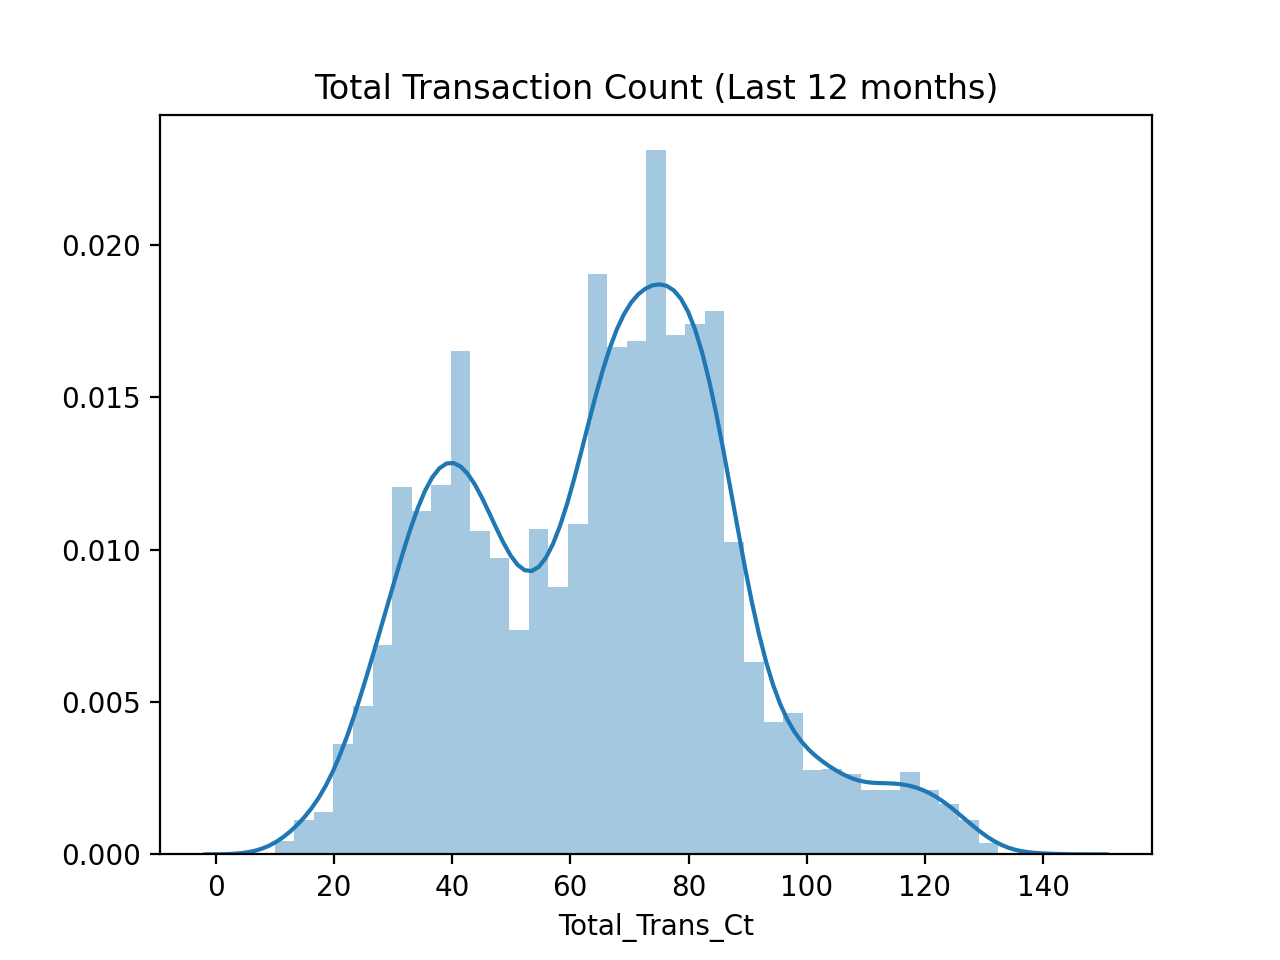

In [70]:
plt.figure(18)
plt.title('Total Transaction Count (Last 12 months)')
sns.distplot(data['Total_Trans_Ct'])
plt.show()

<IPython.core.display.Javascript object>


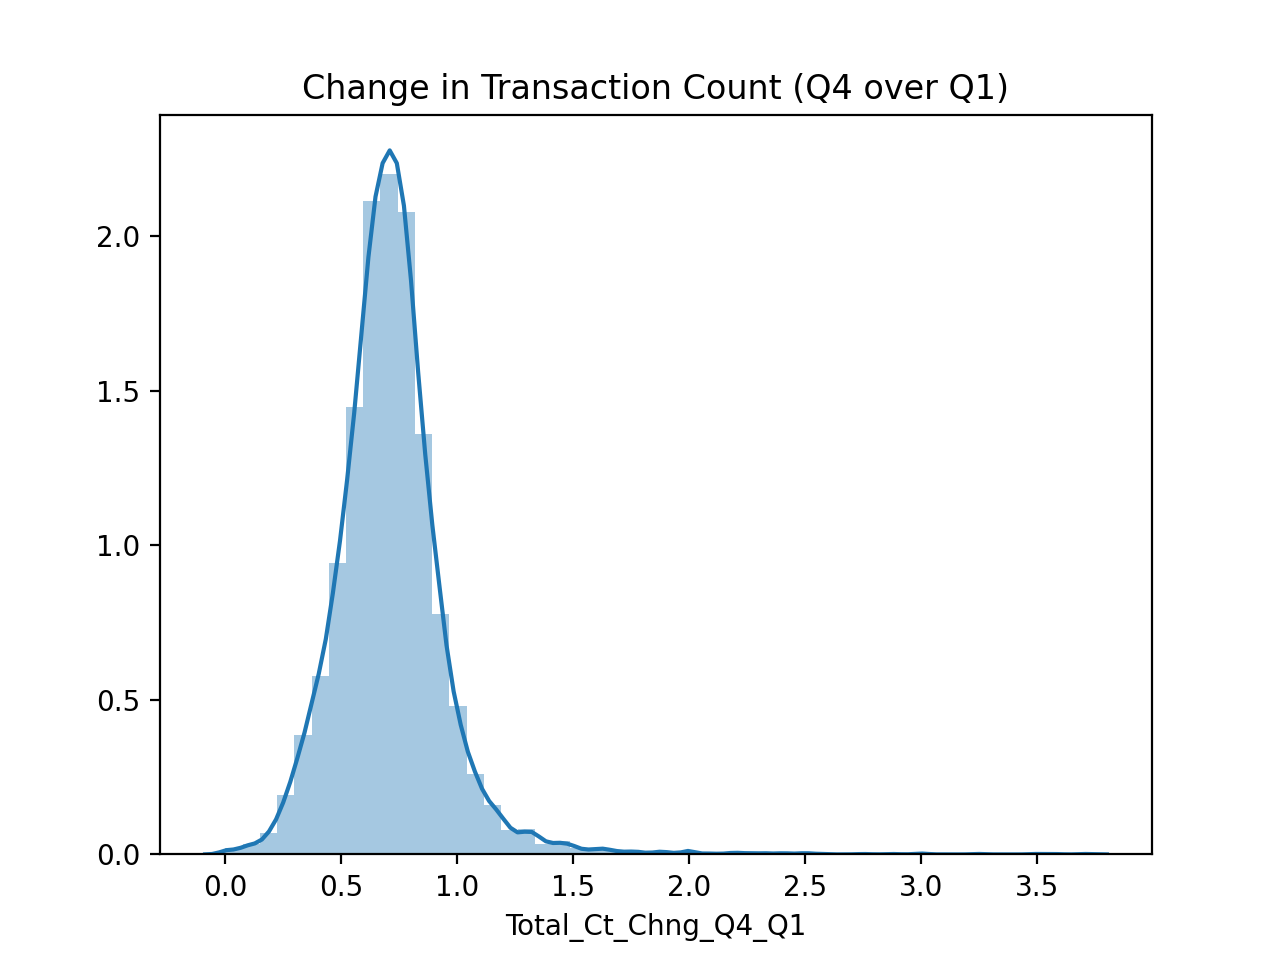

In [71]:
plt.figure(19)
plt.title('Change in Transaction Count (Q4 over Q1)')
sns.distplot(data['Total_Ct_Chng_Q4_Q1'])
plt.show()

<IPython.core.display.Javascript object>


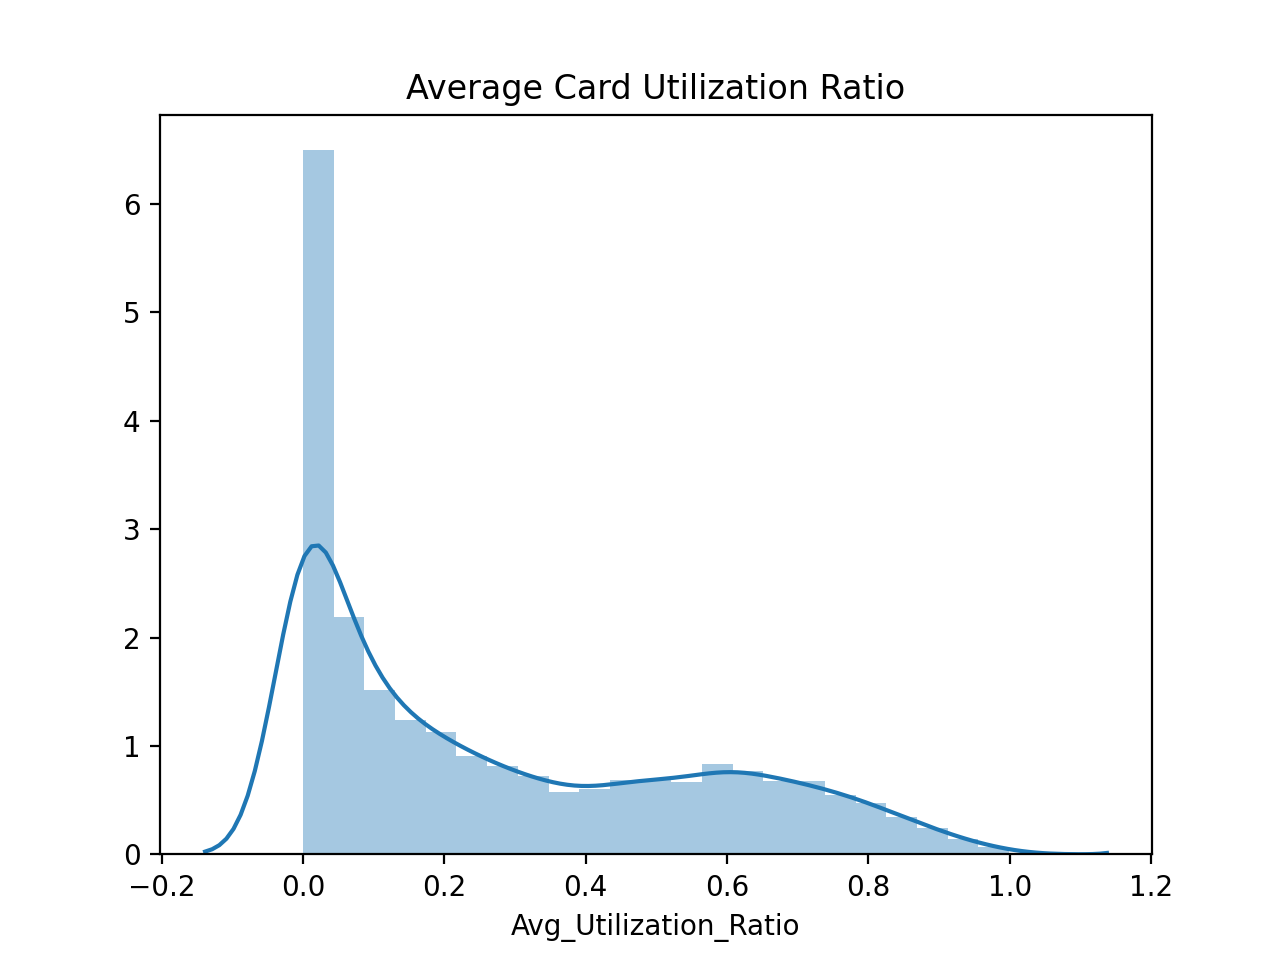

In [72]:
plt.figure(20)
plt.title('Average Card Utilization Ratio')
sns.distplot(data['Avg_Utilization_Ratio'])
plt.show()

We have the following observations:
* The age seems to be normally distributed with mean 46 years.
* The credit limit has a skewed normal distribution with mean 2,500. There are a few outliers with a high credit limit near 35,000.
* The total revolving balance has a spike at 0. Otherwise, it is distributed around 1,500.
* The change in transaction amount is normally distributed with mean 0.7. There is an outlier value of 3.5.
* The total transaction amount in the last 12 months is highly varied. A majority of it is focused around the amount <5,000.
* Most customers have made a total of between 40-80 transactions in the last 12 months.
* A majority of the customers have stuck to their spending habits. The change in the number of transactions has more or less remained the same through quarters (0 to 1.5). However, there is an outlier of 3.5.
* There is a large spike in the card utilization ratio of around 0. That means that a lot of the customers have not used their card at all.

### 4.3 Bivariate Plots <a id='bi'></a>

We use bivariate plots to plot the relationship between different two-feature pairs.

#### 4.3.1 Distribution of Credit Limit with Differing Education Level

We use dynamic visualization to animate the distribution of the credit limit at different education levels. The GIF of the plot is saved and attached instead of running the code as there might be compatibility issues viewing the plot. 

In [108]:
# fig, ax = plt.subplots()

# x = data['Credit_Limit'].unique()
# x.sort()
# y = data['Credit_Limit'].value_counts()
# y=y.sort_index()
# line, = ax.plot(x,y)
# plt.xlabel("Credit Limit")
# plt.ylabel("Frequency")
# plt.ylim([0,175])
# temp = ax.text(34000,160,'', ha='right', va='top', fontsize=12)

# def yvals(i):
#     educ=['High School', 'Graduate', 'Uneducated', 'Unknown', 'College','Post-Graduate','Doctorate']
#     y = data[data['Education_Level']==educ[i]]['Credit_Limit'].value_counts()
#     y=y.sort_index()
#     y=[0 if item not in y.index else y.at[item] for item in x]
#     return y

# def animate(i):
#     line.set_ydata(yvals(i))
#     educ=['High School', 'Graduate', 'Uneducated', 'Unknown', 'College','Post-Graduate','Doctorate']
#     temp.set_text((educ[i]))
#     return line,


# ani = FuncAnimation(fig, animate, interval=500, blit=True,frames=7)
# plt.show()

# ani.save('data/educCredit.gif', writer='imagemagick', fps=1)

![SegmentLocal](data/educCredit.gif "segment")

We observe that along different education levels, the distribution of the credit limit is more or less the same. Graduates are found to be the largest users of credit cards, with High School graduates coming in second. This may provide some insight into churning as it we can infer that people with a not-so-high level of education (high school) are frequent users of credit cards. 

#### 4.3.2 Distribution of Total Number of Transactions with Differing Card Category

We use dynamic visualization to animate the distribution of the total number of transactions for different card categories. The GIF of the plot is saved and attached instead of running the code as there might be compatibility issues viewing the plot. 

In [104]:
# fig, ax = plt.subplots()

# x = data['Total_Trans_Ct'].unique()
# x.sort()
# y = data['Total_Trans_Ct'].value_counts()
# y=y.sort_index()
# line, = ax.plot(x,y)
# plt.xlabel("Total Transaction Count")
# plt.ylabel("Frequency")
# #plt.ylim([0,175])
# temp = ax.text(140,200,'', ha='right', va='top', fontsize=12)

# def yvals(i):
#     cat=["Blue", "Gold", "Silver", "Platinum"]
#     y = data[data['Card_Category']==cat[i]]['Total_Trans_Ct'].value_counts()
#     y=y.sort_index()
#     y=[0 if item not in y.index else y.at[item] for item in x]
#     return y

# def animate(i):
#     line.set_ydata(yvals(i))
#     cat=["Blue", "Gold", "Silver", "Platinum"]
#     temp.set_text((cat[i]))
#     return line,


# ani = FuncAnimation(fig, animate, interval=500, blit=True,frames=4)
# plt.show()

# ani.save('data/catTrans.gif', writer='imagemagick', fps=0.5)

![SegmentLocal](data/catTrans.gif "segment")

It can be seen that most of the transactions are made on Blue tier cards, as it has the highest area under the curve. The varation in the number of transactions in the other tiers is small compared to the variation in the Blue tier.

#### 4.3.3 Distribution of Total Transaction Amount with Differing Gender

We use dynamic visualization to animate the distribution of the total transaction amount for different genders. The GIF of the plot is saved and attached instead of running the code as there might be compatibility issues viewing the plot. 

In [19]:
# fig, ax = plt.subplots()

# x = data['Total_Trans_Amt'].unique()
# x.sort()
# y = data['Total_Trans_Amt'].value_counts()
# y=y.sort_index()
# line, = ax.plot(x,y)
# plt.xlabel("Total Transaction Amount")
# plt.ylabel("Frequency")
# plt.ylim([0,9])
# temp = ax.text(17500,8,'', ha='right', va='top', fontsize=12)

# def yvals(i):
#     gend=["M","F"]
#     y = data[data['Gender']==gend[i]]['Total_Trans_Amt'].value_counts()
#     y=y.sort_index()
#     y=[0 if item not in y.index else y.at[item] for item in x]
#     return y

# def animate(i):
#     line.set_ydata(yvals(i))
#     gend=["M","F"]
#     temp.set_text((gend[i]))
#     return line,


# ani = FuncAnimation(fig, animate, interval=500, blit=True,frames=2)
# plt.show()

# ani.save('data/genTTA.gif', writer='mencoder', fps=1)

![SegmentLocal](data/genTTA.gif "segment")

The animated plot shows the result that men tend to have a higher transaction amount than women.

#### 4.3.4 Distribution of Credit Limit, Age, Total Transaction Amount and Utilization Ratio with Differing Attrition Flag

We use dynamic visualization to animate the distribution of the credit limit, age, total transaction amount and average utilization ratio for different attrition flags. The GIF of the plot is saved and attached instead of running the code as there might be compatibility issues viewing the plot.

We use the relative frequency rather than the frequency of the feature in order to make meaningful comparisons between attrited and existing users.

In [91]:
# fig, ax = plt.subplots()

# x = data['Credit_Limit'].unique()
# x.sort()
# y = data['Credit_Limit'].value_counts()
# y=y.sort_index()
# y=np.array(y)
# y=y/np.sum(y)
# line, = ax.plot(x,y)
# plt.xlabel("Credit Limit")
# plt.ylabel("Relative Frequency")
# plt.ylim([0,0.1])
# temp = ax.text(34000,0.09,'', ha='right', va='top', fontsize=12)

# def yvals(i):
#     attr=["Existing Customer", "Attrited Customer"]
#     y = data[data['Attrition_Flag']==attr[i]]['Credit_Limit'].value_counts()
#     y=y.sort_index()
#     y=[0 if item not in y.index else y.at[item] for item in x]
#     y=np.array(y)
#     y=y/np.sum(y)
#     return y

# def animate(i):
#     line.set_ydata(yvals(i))
#     attr=["Existing Customer", "Attrited Customer"]
#     temp.set_text((attr[i]))
#     return line,


# ani = FuncAnimation(fig, animate, interval=1000, blit=True,frames=2)
# plt.show()

# ani.save('data/aflagCL.gif', writer='mencoder', fps=1)

![SegmentLocal](data/aflagCL.gif "segment")

We observe that customers who have attrited have a greater tendency to have a credit limit of 0 before they shut their account.

In [95]:
# fig, ax = plt.subplots()

# x = data['Customer_Age'].unique()
# x.sort()
# y = data['Customer_Age'].value_counts()
# y=y.sort_index()
# y=np.array(y)
# y=y/np.sum(y)
# line, = ax.plot(x,y)
# plt.xlabel("Customer Age")
# plt.ylabel("Relative Frequency")
# plt.ylim([0,0.07])
# temp = ax.text(70,0.06,'', ha='right', va='top', fontsize=12)

# def yvals(i):
#     attr=["Existing Customer", "Attrited Customer"]
#     y = data[data['Attrition_Flag']==attr[i]]['Customer_Age'].value_counts()
#     y=y.sort_index()
#     y=[0 if item not in y.index else y.at[item] for item in x]
#     y=np.array(y)
#     y=y/np.sum(y)
#     return y

# def animate(i):
#     line.set_ydata(yvals(i))
#     attr=["Existing Customer", "Attrited Customer"]
#     temp.set_text((attr[i]))
#     return line,


# ani = FuncAnimation(fig, animate, interval=1000, blit=True,frames=2)
# plt.show()

# ani.save('data/aflagAge.gif', writer='mencoder', fps=1)

![SegmentLocal](data/aflagAge.gif "segment")

The distribution of age is more or less similar for both existing and attrited customers.

In [102]:
# fig, ax = plt.subplots()

# x = data['Total_Trans_Amt'].unique()
# x.sort()
# y = data['Total_Trans_Amt'].value_counts()
# y=y.sort_index()
# y=np.array(y)
# y=y/np.sum(y)
# line, = ax.plot(x,y)
# plt.xlabel("Total Transaction Amount")
# plt.ylabel("Relative Frequency")
# plt.ylim([0,0.004])
# temp = ax.text(17500,0.0037,'', ha='right', va='top', fontsize=12)

# def yvals(i):
#     attr=["Existing Customer", "Attrited Customer"]
#     y = data[data['Attrition_Flag']==attr[i]]['Total_Trans_Amt'].value_counts()
#     y=y.sort_index()
#     y=[0 if item not in y.index else y.at[item] for item in x]
#     y=np.array(y)
#     y=y/np.sum(y)
#     return y

# def animate(i):
#     line.set_ydata(yvals(i))
#     attr=["Existing Customer", "Attrited Customer"]
#     temp.set_text((attr[i]))
#     return line,


# ani = FuncAnimation(fig, animate, interval=1000, blit=True,frames=2)
# plt.show()

# ani.save('data/aflagTTA.gif', writer='mencoder', fps=1)

![SegmentLocal](data/aflagTTA.gif "segment")

Users with a lower transaction amount between 0-2,500 were more likley to have attrited as compared to users with a higher transaction amount.

In [115]:
# fig, ax = plt.subplots()

# x = data['Avg_Utilization_Ratio'].unique()
# x.sort()
# y = data['Avg_Utilization_Ratio'].value_counts()
# y=y.sort_index()
# y=np.array(y)
# y=y/np.sum(y)
# line, = ax.plot(x,y)
# plt.xlabel("Average Utilization Ratio")
# plt.ylabel("Relative Frequency")
# plt.ylim([0,0.6])
# temp = ax.text(1,0.5,'', ha='right', va='top', fontsize=12)

# def yvals(i):
#     attr=["Existing Customer", "Attrited Customer"]
#     y = data[data['Attrition_Flag']==attr[i]]['Avg_Utilization_Ratio'].value_counts()
#     y=y.sort_index()
#     y=[0 if item not in y.index else y.at[item] for item in x]
#     y=np.array(y)
#     y=y/np.sum(y)
#     return y

# def animate(i):
#     line.set_ydata(yvals(i))
#     attr=["Existing Customer", "Attrited Customer"]
#     temp.set_text((attr[i]))
#     return line,


# ani = FuncAnimation(fig, animate, interval=1000, blit=True,frames=2)
# plt.show()

# ani.save('data/aflagAUR.gif', writer='mencoder', fps=1)

![SegmentLocal](data/aflagAUR.gif "segment")

The average utilization ratio tends to be closer to zero for attrited customers. This is explained by the fact that they probably sign up to claim some reward of sign-on bonus, and then shut their account.

#### 4.3.5 Correlation Matrix

We use the correlation matrix to infer the relationship between the numerical features.

<IPython.core.display.Javascript object>


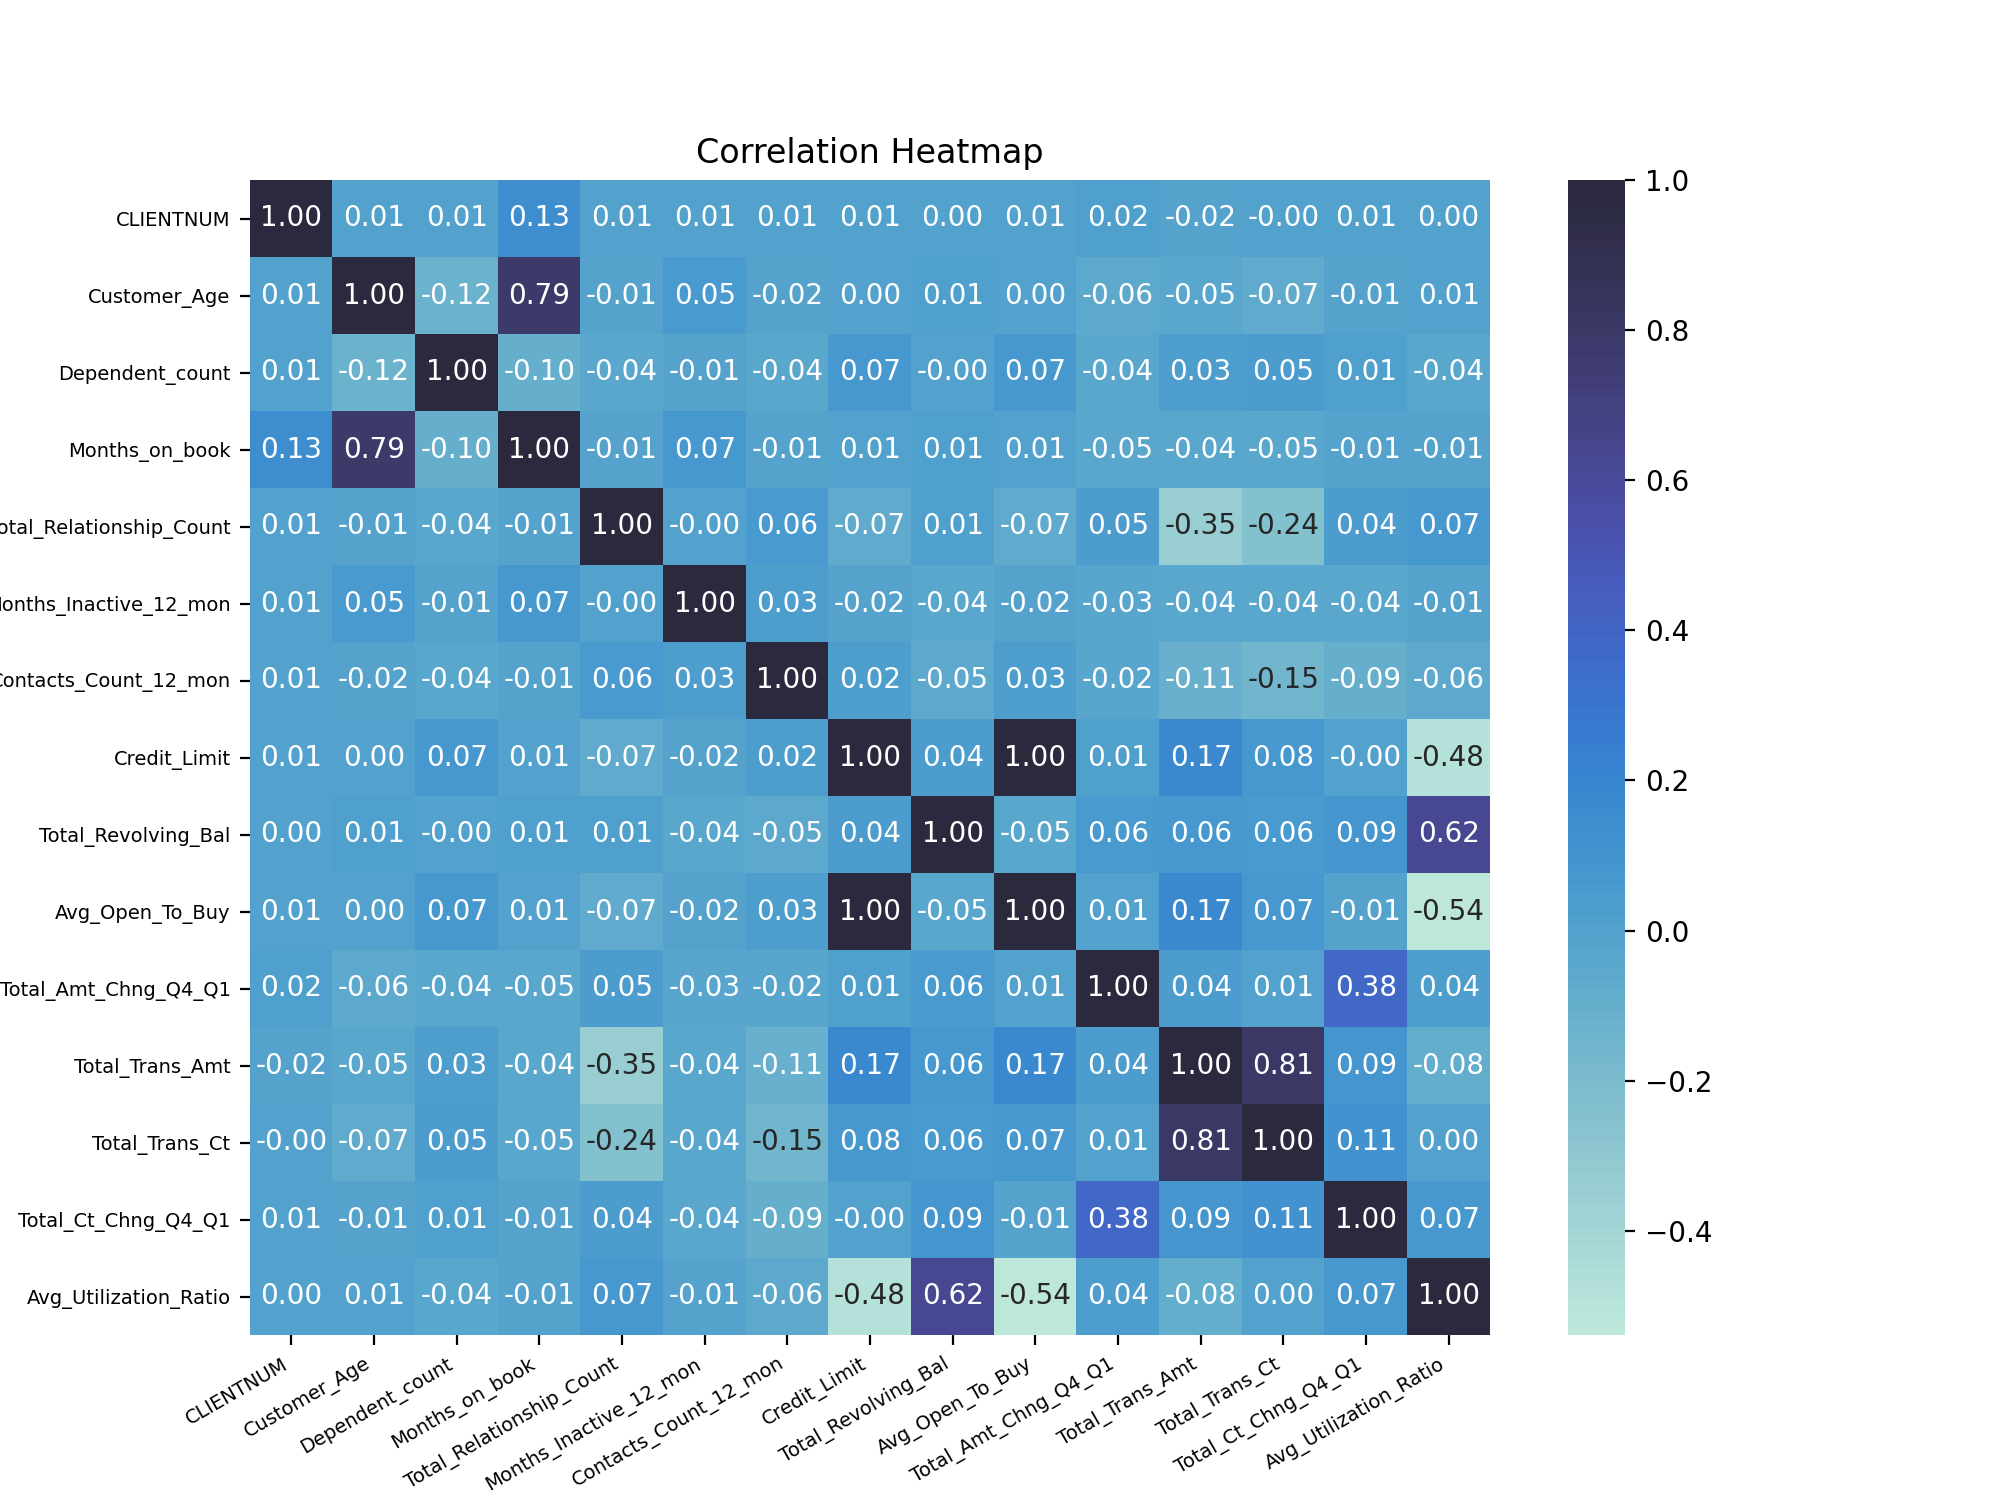

In [29]:
plt.figure(figsize=(10,7.5))
fig_hm = sns.heatmap(data.corr(), annot=True, fmt=".2f",center=1.3)
fig_hm.set_xticklabels(fig_hm.get_xticklabels(),rotation = 30,ha = "right", fontsize=7)
fig_hm.set_yticklabels(fig_hm.get_yticklabels(),fontsize=7)
plt.title('Correlation Heatmap')
plt.show()

Some of the strong correlations we observe are:
* The age of the customer has a strong postitive correlation with the period of relationship with the bank. This is obvious as older people are more likely to be with the bank for a longer time.

* Revolving balance is the portion of credit card spending that goes unpaid at the end of a billing cycle [[2]](#two). This has a strong positive correlation to the card utilization ratio, as people who use their credit cards more are more likley to have unpaid balance.

* Total transaction amount has a strong posititve correlation with total transaction count. This is self explanatory as a higher number of transactions should generally translate to a larger spend.

* Open to Buy is defined as the difference between the balance on the amount and the credit limit [[3]](#three). In other words, it is the amount that is unspent on the card. This has a negative correlation with Credit Card Utilization Ratio, as more unspent amount would mean a lower utilization of the credit card.

* Open to Buy also has a perfectly positive correlation with Credit Limit. This is intuitive as both of them essentially represent the unspent amount on the card. Hence, we can drop one of the features.

### 4.4 Multivariate Plots <a id='multi'></a>

We use multivariate plots to plot the relationship between multiple features.

#### 4.4.1 Age, Credit Limit, and Transaction Amount

We create a 3D scatterplot plot to show the relationship between the three features. It is interactive and can be moved around.

<IPython.core.display.Javascript object>


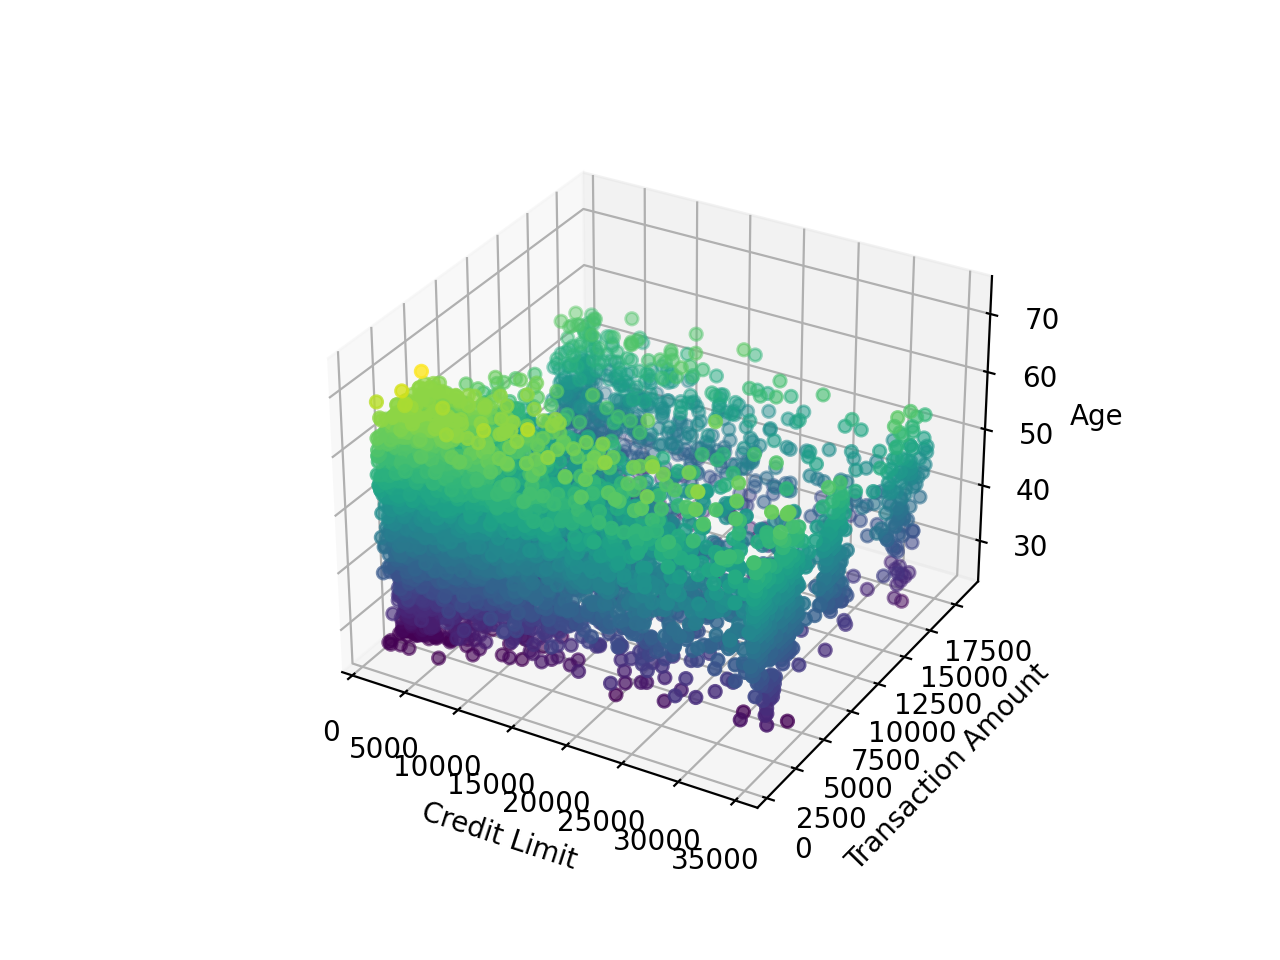

Text(0.5, 0, 'Transaction Amount')

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data['Credit_Limit'], data['Total_Trans_Amt'],data['Customer_Age'],c=data['Customer_Age'])
ax.set_zlabel('Age')
ax.set_xlabel('Credit Limit')
ax.set_ylabel('Transaction Amount')

From the plot, we can observe that a majority of the customers have a low credit limit and have made a low amount of transactions. This trend is seen across age groups.

#### 4.4.2 Credit Limit, Average Utilization Ratio and Attrition Flag

We create a 3D scatterplot plot to show the relationship between the three features. It is interactive and can be moved around.

The Z value is defined to be "1" if the customer has not attrited, and "-1" otherwise

<IPython.core.display.Javascript object>


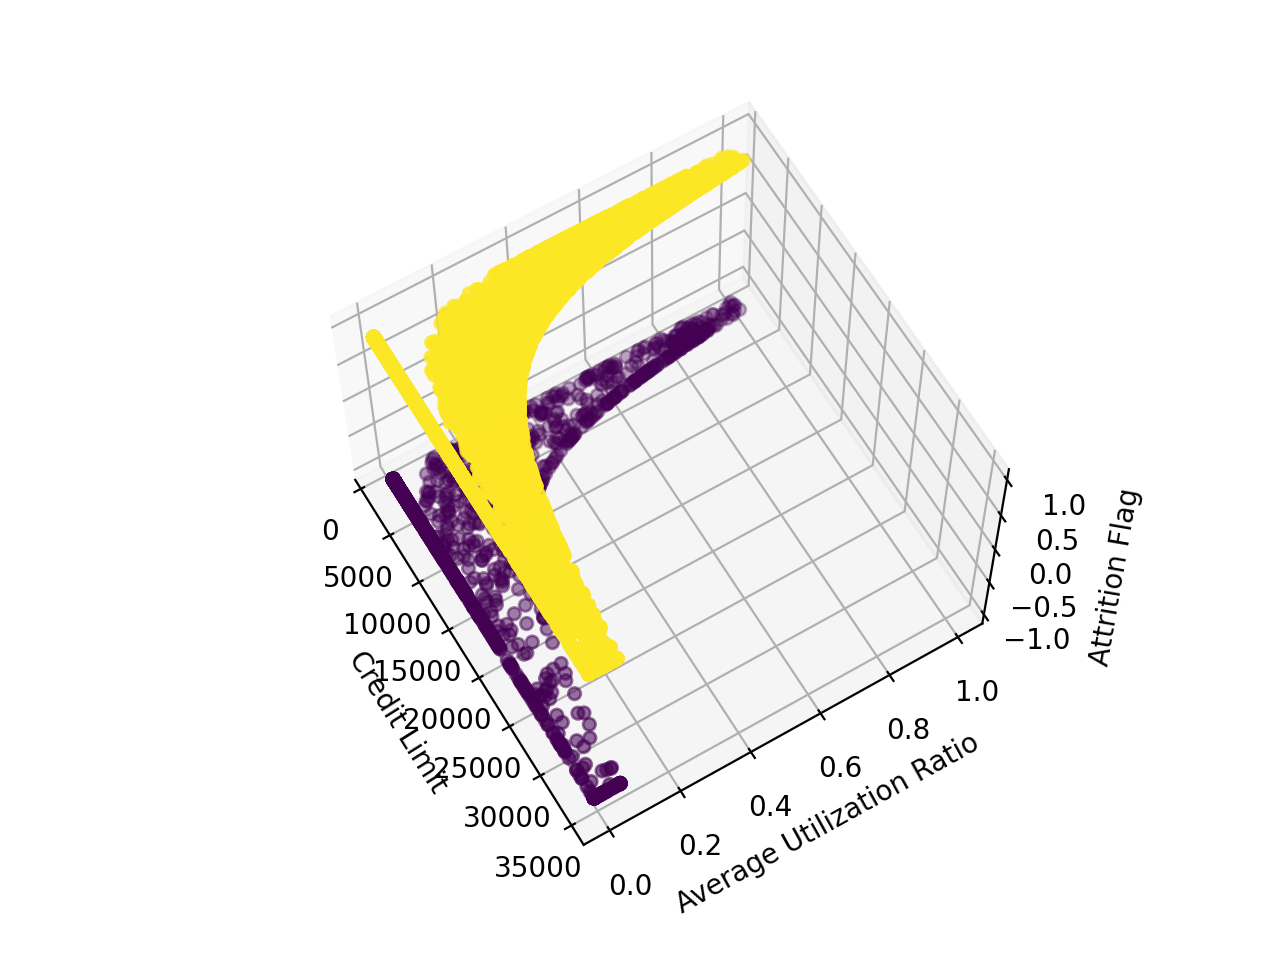

Text(0.5, 0, 'Attrition Flag')

In [27]:
fig = plt.figure()
ax = plt.axes(projection='3d')
z=[1 if item=='Existing Customer' else -1 for item in data['Attrition_Flag']]
ax.scatter3D(data['Credit_Limit'], data['Avg_Utilization_Ratio'],z,c=z)
ax.set_xlabel('Credit Limit')
ax.set_ylabel('Average Utilization Ratio')
ax.set_zlabel('Attrition Flag')

We observe that most customers who have a high utilization ratio tend to have a low credit limit. This trend is common for both attrited and existing customers.

#### 4.4.3 Credit Limit, Total Transaction Amount and Attrition Flag

We create a 3D scatterplot plot to show the relationship between the three features. It is interactive and can be moved around.

The Z value is defined to be "1" if the customer has not attrited, and "-1" otherwise

<IPython.core.display.Javascript object>


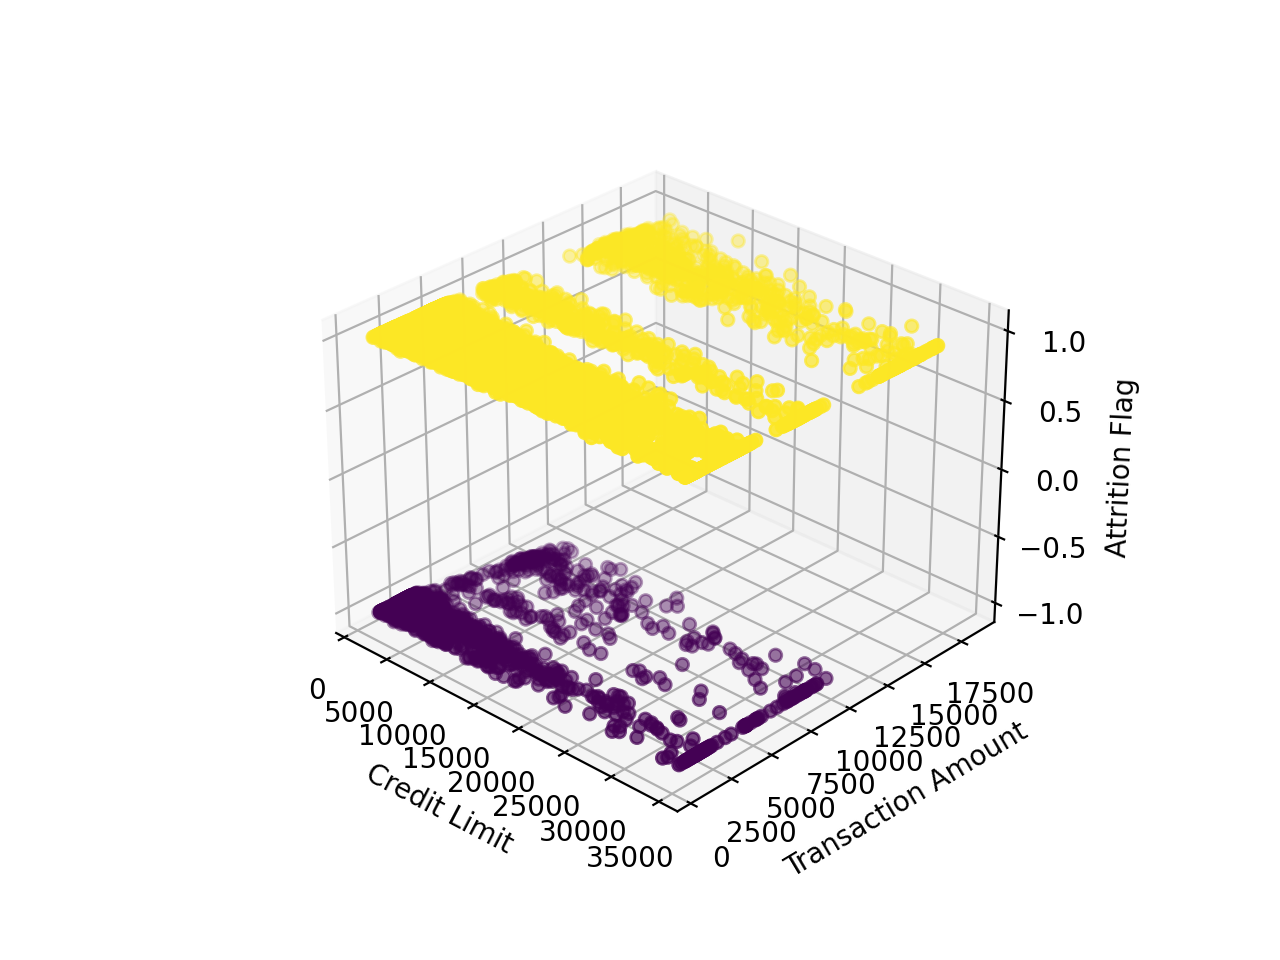

Text(0.5, 0, 'Transaction Amount')

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
z=[1 if item=='Existing Customer' else -1 for item in data['Attrition_Flag']]
ax.scatter3D(data['Credit_Limit'], data['Total_Trans_Amt'],z,c=z)
ax.set_zlabel('Attrition Flag')
ax.set_xlabel('Credit Limit')
ax.set_ylabel('Transaction Amount')

Across different credit limits, those with higher transaction amounts are less likley to churn.

## 5. Data Preprocessing <a id='pre'></a>

As mentioned, CLIENTNUM represents the unique identifier for each client. Therefore, it is not needed for prediction. We also drop Avg_Open_To_Buy as it is perfectly correlated to Credit_Limit.

In [3]:
data=data.drop(["CLIENTNUM"],axis = 1)
data=data.drop(["Avg_Open_To_Buy"],axis = 1)

We check the data for any missing values. Fortunately, the dataset is entirely complete, and there are no missing values.

In [4]:
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

We separate the class variable from the rest of the features.

From the `data.info()` function, we can see that there are 6 object dataypes where the input is a string. These represent our categorical variables. For example, features such as gender, educational level and marital status return strings, as well as the class variable. Pandas includes a category datatype, which is specifically designed to represent categorical variables. We first convert the object datatypes to the category datatype. We will run this procedure on a copy of the data so as to not corrupt the original.

In [5]:
cat_types = ['bool','object','category']
data_clean = data.copy()
data_clean[data_clean.select_dtypes(cat_types).columns] = data_clean.select_dtypes(cat_types).apply(lambda x: x.astype('category'))
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

We will need to turn the categorical variables into numerical representations for the algorithms to work. First, we check for all of the available categories for features with category dtype.

In [6]:
for col in data_clean.select_dtypes('category').columns.to_list():
    print(col + ': '+ str(data_clean[col].cat.categories.to_list()))

Attrition_Flag: ['Attrited Customer', 'Existing Customer']
Gender: ['F', 'M']
Education_Level: ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown']
Marital_Status: ['Divorced', 'Married', 'Single', 'Unknown']
Income_Category: ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Unknown']
Card_Category: ['Blue', 'Gold', 'Platinum', 'Silver']


We first split the class variable from the new dataset. At the same time, we transform the data of the class variable to a numerical representation of 0 or 1.

In [7]:
codes = {'Existing Customer':0, 'Attrited Customer':1}
data_clean['Attrition_Flag'] = data_clean['Attrition_Flag'].map(codes)
y = data_clean['Attrition_Flag']
X = data_clean.drop('Attrition_Flag',errors='ignore',axis=1)

### 5.1 Label Encoding <a id='enc'></a>

For the string type features with n values, we split them into n binary features i.e. one-hot encoding.

In [8]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

features_to_encode = X.select_dtypes('category').columns.to_list()
for feature in features_to_encode:
    X = encode_and_bind(X, feature)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    10127 non-null  int64  
 1   Dependent_count                 10127 non-null  int64  
 2   Months_on_book                  10127 non-null  int64  
 3   Total_Relationship_Count        10127 non-null  int64  
 4   Months_Inactive_12_mon          10127 non-null  int64  
 5   Contacts_Count_12_mon           10127 non-null  int64  
 6   Credit_Limit                    10127 non-null  float64
 7   Total_Revolving_Bal             10127 non-null  int64  
 8   Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 9   Total_Trans_Amt                 10127 non-null  int64  
 10  Total_Trans_Ct                  10127 non-null  int64  
 11  Total_Ct_Chng_Q4_Q1             10127 non-null  float64
 12  Avg_Utilization_Ratio           

### 5.2 Data Scaling and Normalization  <a id='dsn'></a>

We used a stratified train_test_split to split our data into the training and test dataset at a ratio of 80:20. Stratifying works best for imbalanced class sizes such as our dataset, by keeping the same distribution of classes in the training and test sets as in the original dataset. The random_state integer fixes the random seed so that the results are reproducible across function calls.

In [9]:
scaler=StandardScaler() #to standardise features by applying z-score method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, stratify=y, random_state=1)
norm_X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X.columns)

#to show the distribution of classes across datasets

def show_split(split1, split2): 
    split1_0, split1_1 = len(split1[split1==0]), len(split1[split1==1])
    split2_0, split2_1 = len(split2[split2==0]), len(split2[split2==1])
    return split1_0, split1_1,split2_0, split2_1

print('Train: [0 = %d, 1 = %d] Test: [0 = %d, 1 = %d]' % (show_split(y_train, y_test))) 


Train: [0 = 6799, 1 = 1302] Test: [0 = 1701, 1 = 325]


For our validation strategy, we use a cross-validation strategy due to the small number of class1 data that we have. For cross-validation, we use the stratified k-fold method. Again, this method works best for imbalanced class sizes, by keeping the same distribution of classes in each fold as in the training dataset. In the training dataset, the number of class1 data is (1302/1302+6799) = 16% of the total number. With k = 4 folds, each fold has roughly 16% of class1 datapoints. This distribution is also maintained in the train and test split of each fold. The data is normalized after splitting the dataset in each fold.

Below is a demonstration of the stratified k-fold. *Only a demonstration and not used in the actual code*

In [10]:
def skf_demo(X_train,y_train):
    kf = StratifiedKFold(n_splits=4, shuffle=True, random_state = 1)
    for fold_n, (train_idx, val_idx) in enumerate(kf.split(X_train,y_train)):  
        train_X, val_X = X_train.iloc[train_idx, :], X_train.iloc[val_idx, :]
        norm_train_X = pd.DataFrame(scaler.fit_transform(train_X), columns = train_X.columns)
        norm_val_X = pd.DataFrame(scaler.fit_transform(val_X), columns = val_X.columns)
        train_y, val_y = y_train.iloc[train_idx], y_train.iloc[val_idx]

        #Output test
        print('Fold:', [fold_n+1], 'Train: [0 = %d, 1 = %d] Val: [0 = %d, 1 = %d]' % (show_split(train_y, val_y)))

skf_demo(X_train,y_train)

Fold: [1] Train: [0 = 5099, 1 = 976] Val: [0 = 1700, 1 = 326]
Fold: [2] Train: [0 = 5099, 1 = 977] Val: [0 = 1700, 1 = 325]
Fold: [3] Train: [0 = 5099, 1 = 977] Val: [0 = 1700, 1 = 325]
Fold: [4] Train: [0 = 5100, 1 = 976] Val: [0 = 1699, 1 = 326]


## 6 Data Analysis <a id='da'></a>

### 6.1 Model Selection  <a id='ms'></a>
There are four competing supervised classfication models/algorithms under our consideration, namely, Logistic Regression classification, Random Forest classifier, KNeighbours classification, and XGBoost classifier. We will select based on the evaluation metrics as shown in the section 6.2 below.  

#### 6.1.1 Logistic Regression classification

This is the basic logistic regression classification we learned in class. For an easier implementation, we use the class `sklearn.linear_model.LogisticRegression`. 

In this package, there are several hyperparameters that we need to pay attention to: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;C: controls the strength of regularisation penalty  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;solver: algorithms used for optimisation  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;class_weight: weights associated with classes

A reasonable range for each hyperparameter is shown below which will be used for hyperparameter tuning. 

In [11]:
log_params = {"clf__solver": ["lbfgs", "sag", "saga"],
               "clf__C": np.arange(0.1,2,0.1), 
               "clf__class_weight": ["balanced", None]
              }

#### 6.1.2 Random Forest classifier

As its name suggests, Random Forest consists of an ensemble of decision trees. The algorithm splits the dataset into independent random subsamples and selects subsamples of features (draw with replacement), and fits a decision tree classfier to each subsample. It then averages the estimates to improve the prediction accuracy. 

We will use the class `sklearn.ensemble.RandomForestClassifier` from scikit learn. Based on our research, there are several hyperparameters that we will need to adjust: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;n_estimator: the number of trees in the forest  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;min_samples_split:the minimum number of data points required to be at a leaf node  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;max_features: the number of features to consider when looking for the best split  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;max_depth: the maximum depth of the tree  

We set a reasonable range for each parameter based on our dataset to experiment with in the later section. 



In [12]:
clf__max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
clf__max_depth.append(None)

rfc_params = {"clf__n_estimators": np.linspace(start = 100, stop = 1000, num = 10,dtype=int),
              "clf__min_samples_split": np.arange(2,6), 
              "clf__max_features":["sqrt", "log2"],
              "clf__max_depth": clf__max_depth
             }

#### 6.1.3 KNeighbours classification

KNeighbours classfication is a very intuitive way of classifying data points. It chooses K nearest data points to the unlabeled data point then ask the K neighbours to "vote" for the classes that the point belongs to.  

We will use the class `sklearn.neighbors.KNeighborsClassifier` for the implementation. Important hyperparameters that we will adjust are shown as follows: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;n_neighbors: the number of closest neigbours  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;weights: weight function in prediction  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;p: Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2  

Reasonable ranges for the hyperparameters are shown below. 

In [13]:
knn_params = {"clf__n_neighbors":[2,5,10,87,100],
              "clf__weights":["uniform", "distance"],
              "clf__p":[1,2] 
             }

#### 6.1.4 XGBoost classifier

XGBoost makes use of the gradient boosting technique, and is developed based on the notion of decison tree ensemble, which consists of a set of classification and regression trees (CART). Its intuition is similar to Random Forest, but the difference is how the algorithms train the models. 

We use `xgboost.XGBClassifier` for implementation. The hyperparameters we need to fine-tune are as follows:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;learning_rate: the learning rate of gradient boosting  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;max_depth:maximum tree depth  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;min_child_weight: minimum sum of instance weight(hessian) needed in a child. Useful to reduce overfitting  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;reg_lambda: L2 regularisation

Reasonable ranges for the hyperparameter are shown below. 





In [20]:
xgb_params = {"clf__learning_rate": [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
               "clf__max_depth": np.arange(2,7),
               "clf__min_child_weight": np.arange(1,11),
               "clf__reg_lambda": np.linspace(0.1,1,num=10)
              }


### 6.2 Evaluation Metrics  <a id='em'></a>
Since classes in the data are unbalanced, we need to examine the confusion matrix. Recall and precision can be calculated from the confusion matrix, and allow us to assess the models. 

$Precision = \frac{\#TP}{\#Predicted Positive} = \frac{\#TP}{\#TP + \#FP}$  

$Recall = \frac{\#TP}{\#Actual Positive} = \frac{\#TP}{\#TP + \#FN}$


In this project, we aim to predict potential churn customers, and we realise that the client cost of mistakenly classifying non-churn customer as churn may be high in practice because banks would not want to lose valuable customers, and the banks would like to identify churners at their best efforts as well. Thus, it would be useful to consider Precision and Recall simultaneously. However, as Brownlee [[4]](#four) pointed out, evaluation based on Precision and Recall does not take into account the majority class (True negative) and the estimates may be biased towards the minority class. To complement this, we decide to use another commonly used evaluation tool Receiver Operating Characteristic curve (ROC). ROC is a plot of True Positive Rate (TPR) against False Positive Rate (FPR). 

$TPR = \frac{\#TP}{\#TP + \#FN}$  

$FPR =  \frac{\#FP}{\#FP + \#TN}$  

To consider TPR and FPR simultanesouly, we can make use of the area under the curve (AUC) of ROC. 

In the following sections, we will use of AUC of ROC as an evaluation tool for hyperparameter tuning and model comparison. 

### 6.3 Hyperparameter Tuning  and Model Training <a id='ht'></a>
As we have shown previously, each model is subject to various hyperparameters that need to be determined. We use the random search and grid search methods to optimise the hyperparameters for our chosen models. Grid search exhaustively checks every combinations of hyperparameters given in the parameter domain to optimise the given score, which is roc_auc in this project. Random search checks random combinations of hyperparameters for a given number of iterations to optimise the given score. The advantage of random search is shorter time but the trade-off is that it might miss the best possible combination. 

We can use `GridSearchCV` and `RandomizedSearchCV` in sciki learn to run the grid search and random search processes. With the optimal hyperparameters, we can start to train the models. 

We first construct functions, `rand_search()`, and `grid_search()`, to streamline the implementation. Sciki learn has the class `Pipeline`, which allows us to automate the scaling of the training and validation sets in each fold. Therfore, the un-normalized training and test set is passed into the function. We then train the models with training dataset.  

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

def rand_search(X_train,y_train,parameters,cv,scoring,verbose,model,n_iter=100):
    clf_pipeline = Pipeline([( "scaler" , scaler),("clf",model)])   #Pipeline applies scaling and model estimator
    clf_rand = RandomizedSearchCV(clf_pipeline, parameters, n_iter = n_iter, cv=cv, scoring=scoring,verbose = verbose, random_state=1,n_jobs=-1)
    clf_rand.fit(X_train,y_train)  #learn the training set
    
    print("Best parameters for ", model) 
    print(clf_rand.best_params_)
    print(f"\nBest train %s score: {clf_rand.best_score_ :.2f}" % (scoring))
    return clf_rand.best_estimator_

In [15]:
from sklearn.model_selection import GridSearchCV

def grid_search(X_train,y_train,parameters,cv,scoring,verbose,model):
    clf_pipeline = Pipeline([( "scaler" , scaler),("clf",model)])   #Pipeline applies scaling and model estimator
    clf_grid = GridSearchCV(clf_pipeline, parameters, cv=cv, scoring=scoring,verbose = verbose)
    clf_grid.fit(X_train,y_train)  #learn the training set

    print("Best parameters for ", model) 
    print(clf_grid.best_params_)
    print(f"\nBest train %s score: {clf_grid.best_score_ :.2f}" % (scoring))
    return clf_grid.best_estimator_

skfold = StratifiedKFold(n_splits=4, shuffle = True, random_state=1) #apply stratified k fold
scoring = 'roc_auc'  #declare the assessing score as roc_auc 

#### 6.3.1 Logistic regression
*Warning: grid search may take a while*

In [16]:
clf = LogisticRegression()

log_best_estimator = grid_search(X_train,y_train, log_params, skfold, scoring ,1,clf)

Fitting 4 folds for each of 114 candidates, totalling 456 fits
Best parameters for  LogisticRegression()
{'clf__C': 1.2000000000000002, 'clf__class_weight': 'balanced', 'clf__solver': 'sag'}

Best train roc_auc score: 0.92


#### 6.3.2 Random forest 

Due to the range and number of hyperparameters we would like to optimise, we would expect 10 x 4 x 2 x 11 x 4 folds = 3520 iterations by grid search, which is extremely time consuming given that Random forest algorithm is slower in nature. Thus, for hyperparameter fine-tuning for Random forest model, we use random search for the interest of time. But still, **random search takes about 10 minutes**. Please be patient :)

According to Zheng [[5]](#five), random search has a probability of 95% of finding a combination of parameters within the 5% range of optima with only 60 iterations. So with some trial runs of the program, we set the iteration to be 120, which is a good balance between optimisation accuracy and time. 

In [37]:
clf=RandomForestClassifier(random_state=1,n_jobs=-1)

rfc_best_estimator = rand_search(X_train,y_train, rfc_params, skfold, scoring ,1,clf,n_iter=120) #apply random search

Fitting 4 folds for each of 120 candidates, totalling 480 fits
Best parameters for  RandomForestClassifier(n_jobs=-1, random_state=1)
{'clf__n_estimators': 700, 'clf__min_samples_split': 3, 'clf__max_features': 'sqrt', 'clf__max_depth': 35}

Best train roc_auc score: 0.99


#### 6.3.3 KNeighbours

In [18]:
clf = KNeighborsClassifier(n_jobs=-1)

knn_best_estimator = grid_search(X_train,y_train, knn_params, skfold, scoring ,1,clf)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
Best parameters for  KNeighborsClassifier(n_jobs=-1)
{'clf__n_neighbors': 87, 'clf__p': 1, 'clf__weights': 'distance'}

Best train roc_auc score: 0.92


#### 6.3.4 XGBoost

XGBoost takes in a lot of parameters, even after choosing a small set of important hyperparameter, we would expect 6 x 5 x 10 x 10 x 4 folds = 12000 iterations. Thus, we will use random search to fine-tune the hypyerparameters of XGBoost. We set the number of iteration to 60 for a good balance of optimisation accuracy and time efficiency.

*Note: This takes about 5 minutes. Please be patient* :) 

In [21]:
from xgboost import XGBClassifier
clf = XGBClassifier(booster="gbtree", verbosity=0, use_label_encoder=False,n_jobs=-1)

xgb_best_estimator = rand_search(X_train,y_train, xgb_params, skfold,scoring,1,clf,n_iter=120)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
Best parameters for  XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None, verbosity=0)
{'clf__reg_lambda': 0.2, 'clf__min_child_weight': 1, 'clf__max_depth': 4, 'clf__learning_rate': 0.2}

Best train roc_auc score: 0.99


### 6.4 Evaluation  <a id='ev'></a>

We then run the model using the best estimators on the test set, and print out the confusion matrix and evaluation metrics. 

Still, we pack our procedures into function `eval_model( )` to streamline the process. 

In [43]:
evaluation = pd.DataFrame({'Model': [],
                           'Accuracy':[],
                          'Recall':[],
                          'Precision':[],
                          'F1':[],
                          'ROC_AUC':[]})

def eval_model(estimator, X_test, y_test, name):
    y_pred = estimator.predict(X_test)
    y_confusion = confusion_matrix(y_test, y_pred)
    y_class_report = classification_report(y_test, y_pred, target_names=["not 1", "1"])
    acc = (accuracy_score(y_test, y_pred)*100)
    recall = recall_score(y_test, y_pred)*100
    precision = precision_score(y_test, y_pred)*100
    f1 = f1_score(y_test, y_pred)*100
    
    if name != 'LogReg':
        y_proba = estimator.predict_proba(X_test)
        fpr, tpr, threshold = roc_curve(y_test, y_proba[:,1])
    else:
        y_proba = estimator.decision_function(X_test)
        fpr, tpr,threshold = roc_curve(y_test, y_proba)
        
    y_auc = auc(fpr, tpr)*100
                                                                                                                                                                                                                                             
    r = evaluation.shape[0]
    evaluation.loc[r] = [name, acc, recall, precision, f1, y_auc]  

    print(name, "ROC_AUC Score: %.2f" % y_auc)
    print("______________________________________\n")
    print(name, "confusion matrix\n", y_confusion )
    print("______________________________________\n")
    print(name, "classification report\n", y_class_report )

#### 6.4.1 Logistic regression

In [44]:
eval_model(log_best_estimator,X_test,y_test, 'LogReg')

LogReg ROC_AUC Score: 93.46
______________________________________

LogReg confusion matrix
 [[1420  281]
 [  39  286]]
______________________________________

LogReg classification report
               precision    recall  f1-score   support

       not 1       0.97      0.83      0.90      1701
           1       0.50      0.88      0.64       325

    accuracy                           0.84      2026
   macro avg       0.74      0.86      0.77      2026
weighted avg       0.90      0.84      0.86      2026



##### Feature Importance

<IPython.core.display.Javascript object>


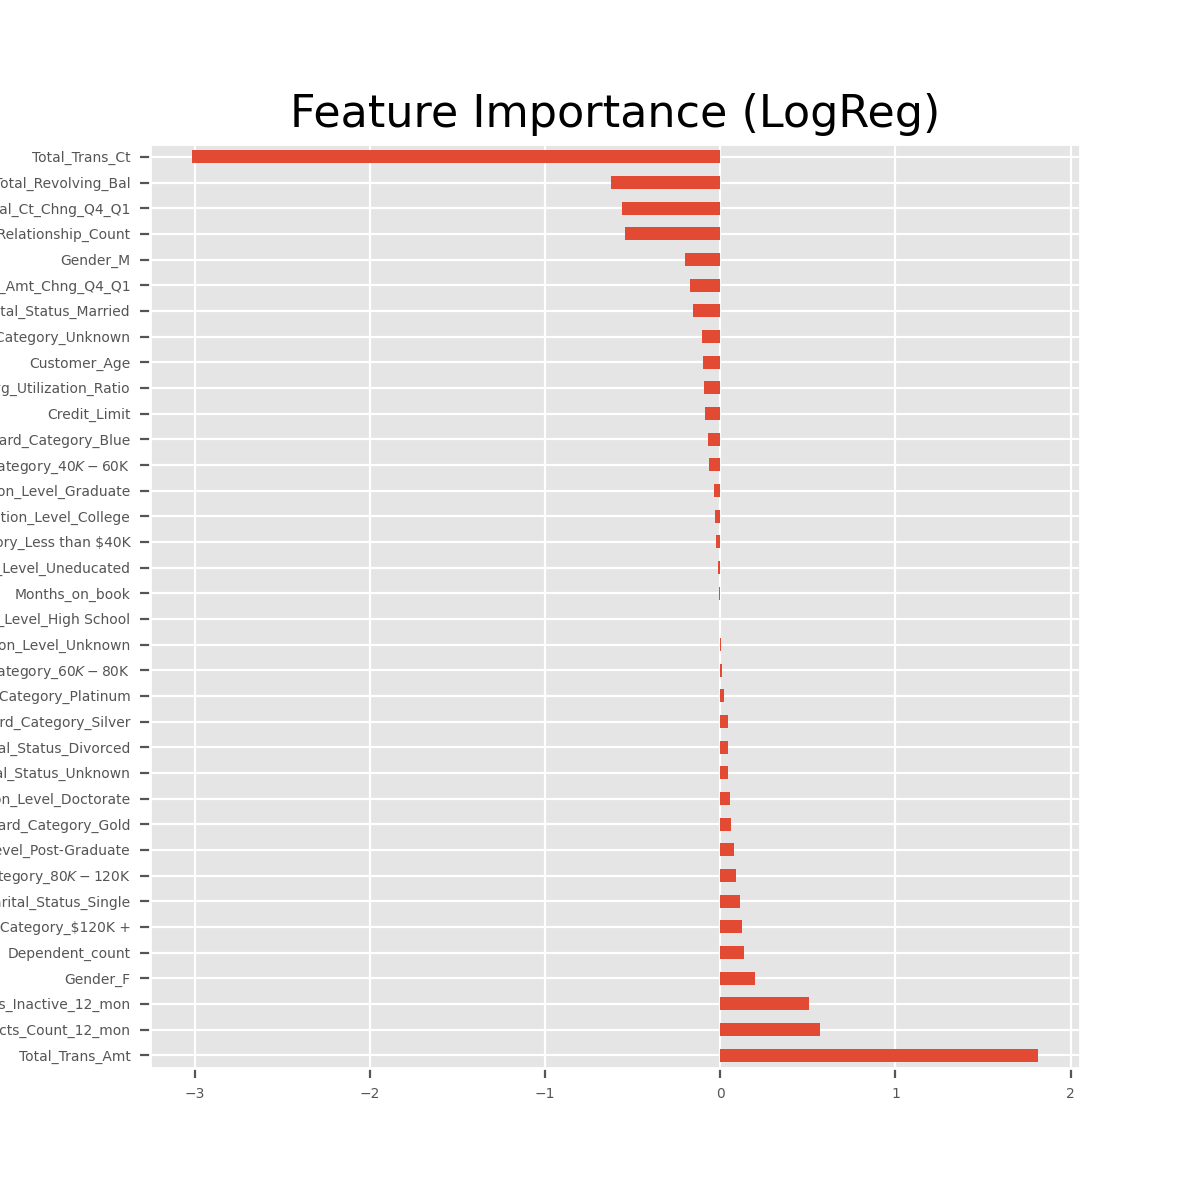

In [45]:
plt.style.use('ggplot')
plt.figure(figsize=(6,6))
plt.title('Feature Importance (LogReg)', fontsize=16)
feat_importances = pd.Series(log_best_estimator.named_steps["clf"].coef_.tolist()[0], index=X_train.columns)
feat_importances.nlargest(50).plot(kind='barh',fontsize=5)
plt.show()

#### 6.4.2 Random Forest

In [46]:
eval_model(rfc_best_estimator,X_test,y_test, 'RandomForest')

RandomForest ROC_AUC Score: 99.12
______________________________________

RandomForest confusion matrix
 [[1684   17]
 [  60  265]]
______________________________________

RandomForest classification report
               precision    recall  f1-score   support

       not 1       0.97      0.99      0.98      1701
           1       0.94      0.82      0.87       325

    accuracy                           0.96      2026
   macro avg       0.95      0.90      0.93      2026
weighted avg       0.96      0.96      0.96      2026



##### Feature Importance

<IPython.core.display.Javascript object>


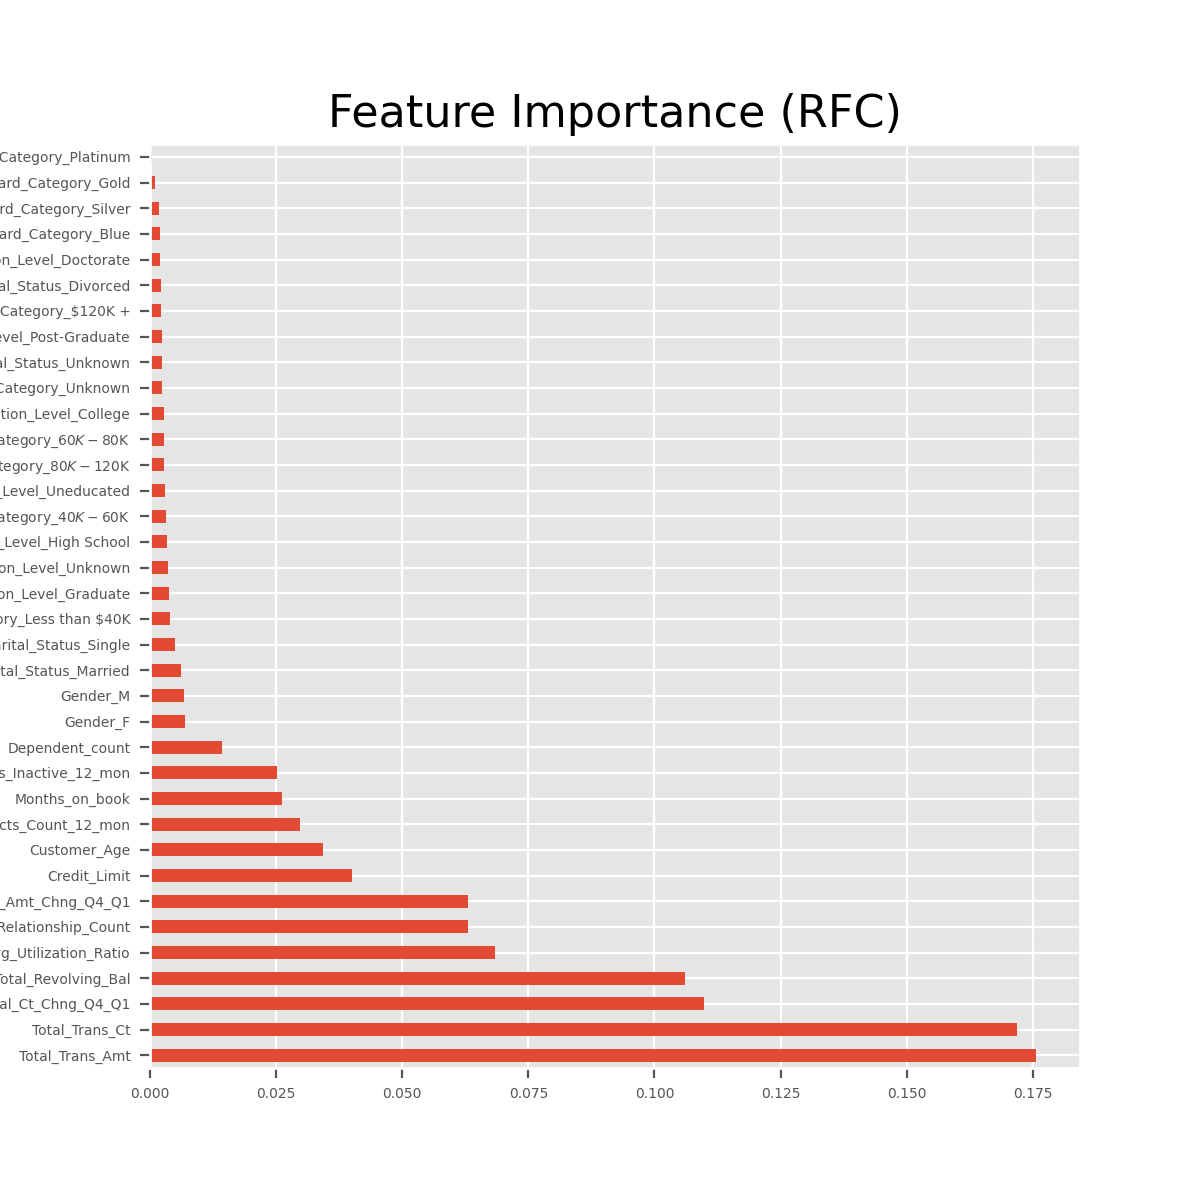

In [47]:
plt.style.use('ggplot')
plt.figure(figsize=(6,6))
plt.title('Feature Importance (RFC)', fontsize=16)
feat_importances = pd.Series(rfc_best_estimator.named_steps["clf"].feature_importances_, index=X_train.columns)
feat_importances.nlargest(50).plot(kind='barh',fontsize = 5)
plt.show()

#### 6.4.3 KNeigbours

In [48]:
eval_model(knn_best_estimator,X_test,y_test, 'KNeigbours')

KNeigbours ROC_AUC Score: 92.64
______________________________________

KNeigbours confusion matrix
 [[1696    5]
 [ 266   59]]
______________________________________

KNeigbours classification report
               precision    recall  f1-score   support

       not 1       0.86      1.00      0.93      1701
           1       0.92      0.18      0.30       325

    accuracy                           0.87      2026
   macro avg       0.89      0.59      0.61      2026
weighted avg       0.87      0.87      0.83      2026



#### 6.4.4 XGBoost

In [49]:
eval_model(xgb_best_estimator,X_test,y_test, 'XGBoost')

XGBoost ROC_AUC Score: 99.50
______________________________________

XGBoost confusion matrix
 [[1684   17]
 [  23  302]]
______________________________________

XGBoost classification report
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99      1701
           1       0.95      0.93      0.94       325

    accuracy                           0.98      2026
   macro avg       0.97      0.96      0.96      2026
weighted avg       0.98      0.98      0.98      2026



##### Feature Importance

<IPython.core.display.Javascript object>


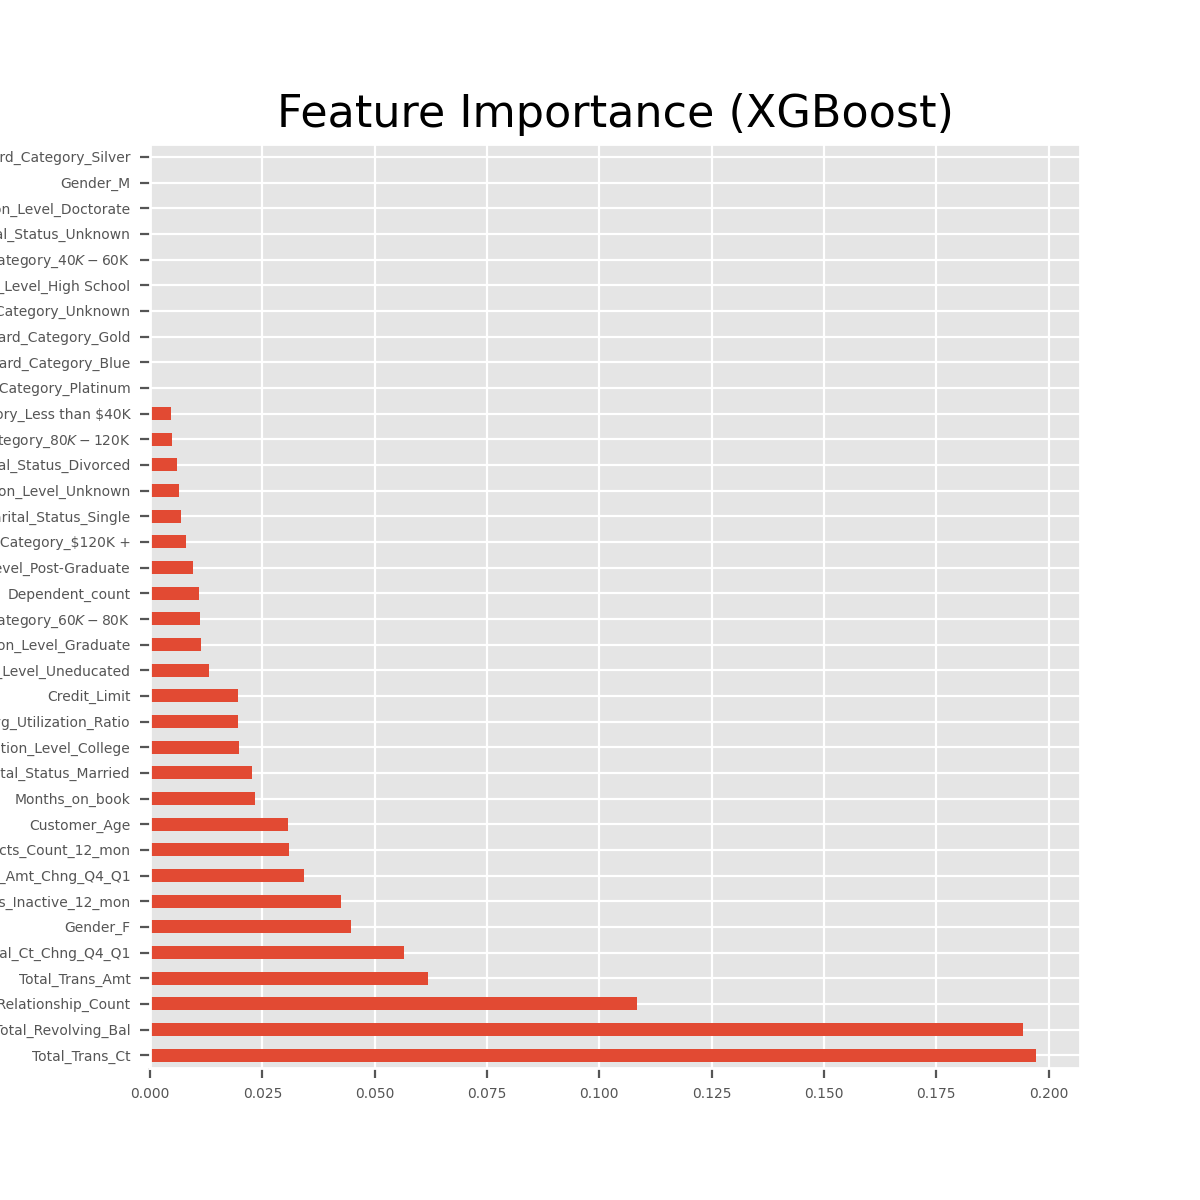

In [50]:
plt.style.use('ggplot')
plt.figure(figsize=(6,6))
plt.title('Feature Importance (XGBoost)', fontsize=16)
feat_importances = pd.Series(xgb_best_estimator.named_steps["clf"].feature_importances_, index=X_train.columns)
feat_importances.nlargest(50).plot(kind='barh',fontsize=5)
plt.show()

### 6.5 Summary of Results  <a id='sum'></a>

We summarise the results in the table and diagram below. 

XGBoost and Random Forest perform the best among the four models in terms of roc_auc.  
They are the best predictors of this data problem. 

Consider the feature importance as shown in the section above 

The top 3 most important feature from XGBoost model are (in descending order):  
1. Total_Trans_Ct (Total transaction count in the last 12 months)  
2. Total_Revolving_Bal (Total revolving balance on the credit card)  
3. Total_Relationship_Count (Total number of products held by the customer)  

The top 3 most important feature from Random forest model are (in descending order):  
1. Total_Trans_Amt (Total transaction amount in the last 12 months)  
2. Total_Trans_Ct (Total transaction count in the last 12 months)  
3. Total_Ct_Chng_Q4_Q1 (Change in Transaction Count from Q4 to Q1)  

These suggest that *Total_Trans_Ct* is the most important common predictor of churners based on our findings. 

In [51]:
evaluation.sort_values(by ='ROC_AUC', ascending = False)

Model   Accuracy     Recall  Precision         F1    ROC_AUC
3       XGBoost  98.025666  92.923077  94.670846  93.788820  99.498575
1  RandomForest  96.199408  81.538462  93.971631  87.314662  99.123231
0        LogReg  84.205331  88.000000  50.440917  64.125561  93.457966
2    KNeigbours  86.623889  18.153846  92.187500  30.334190  92.636730

#### ROC Curve

<IPython.core.display.Javascript object>


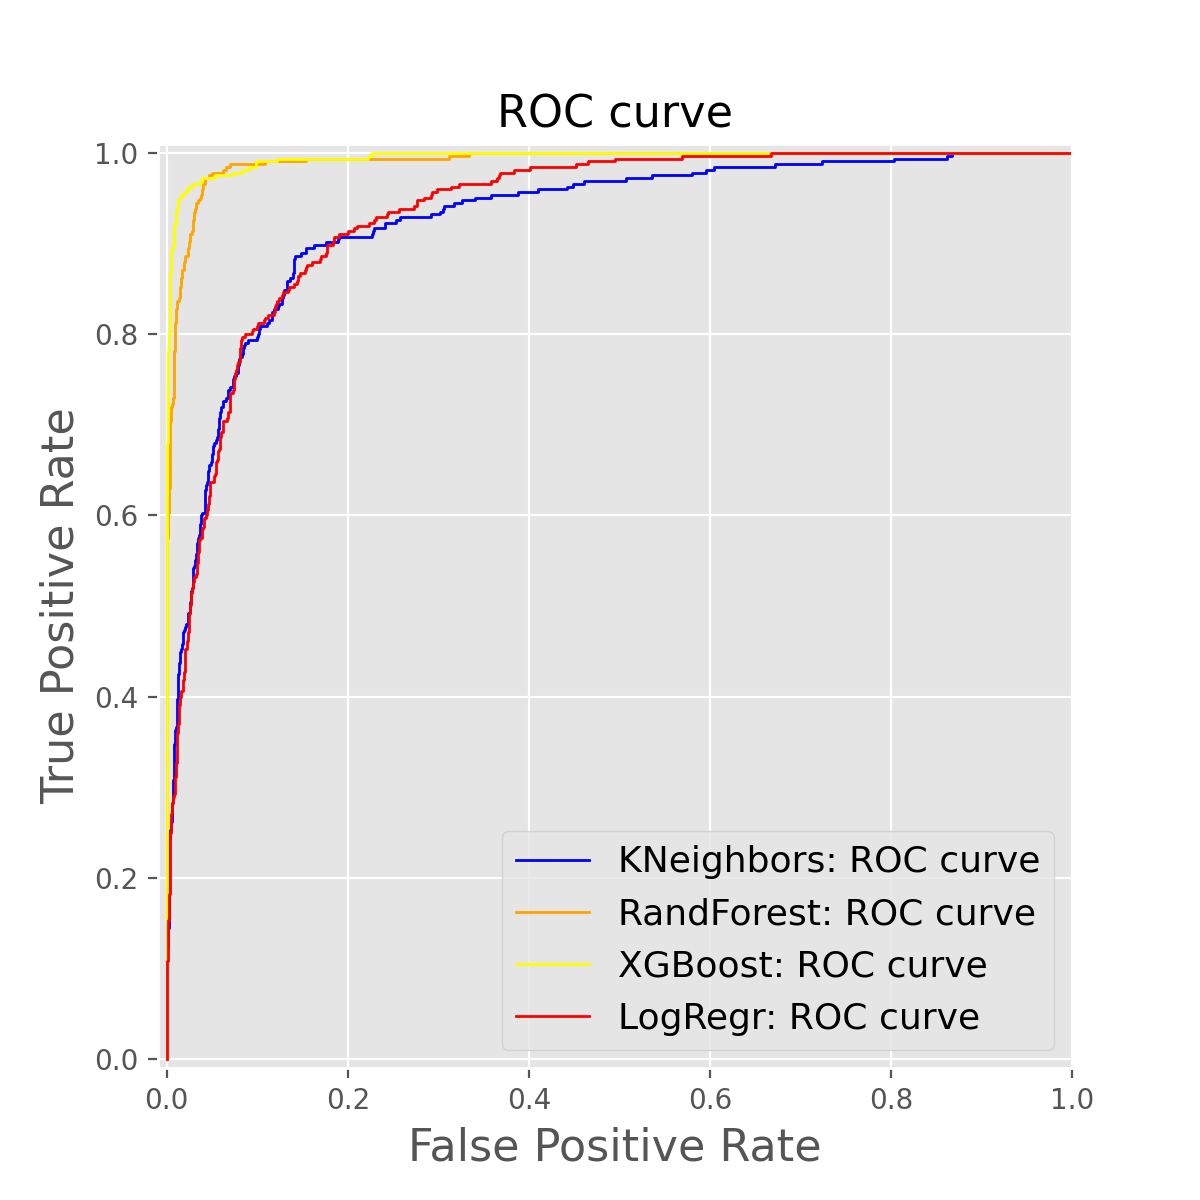

In [52]:
y_proba_knn = knn_best_estimator.predict_proba(X_test)
y_proba_rfc = rfc_best_estimator.predict_proba(X_test)
y_proba_xgb = xgb_best_estimator.predict_proba(X_test)
y_scores_log = log_best_estimator.decision_function(X_test)

fpr_knn, tpr_knn, knn_thresholds = roc_curve(y_test, y_proba_knn[:,1])
fpr_rfc, tpr_rfc, rfc_thresholds = roc_curve(y_test, y_proba_rfc[:,1])
fpr_xgb, tpr_xgb, xgb_thresholds = roc_curve(y_test, y_proba_xgb[:,1])
fpr_log, tpr_log, log_thresholds = roc_curve(y_test, y_scores_log)

plt.figure(figsize=(6,6))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_knn, tpr_knn, lw=1, label='KNeighbors: ROC curve', color='blue')
plt.plot(fpr_rfc, tpr_rfc, lw=1, label='RandForest: ROC curve', color='orange')
plt.plot(fpr_xgb, tpr_xgb, lw=1, label='XGBoost: ROC curve', color='yellow')
plt.plot(fpr_log, tpr_log, lw=1, label='LogRegr: ROC curve', color='red')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.axes().set_aspect('equal')
plt.show();

#### Precision-Recall Curve
Even though we are not using Precision and Recall to evaluation our models. We can still look at the Precision-Recall Curve for some additional information. 

If we consider the area under the curve, we can see that XGBoost and Random Forest still outperform other models by a lot, but XGBoost has a more obvious improvement over Random forest. This difference might be attributed to biasness towards the minority class when using Precision-Recall approach. 

<IPython.core.display.Javascript object>


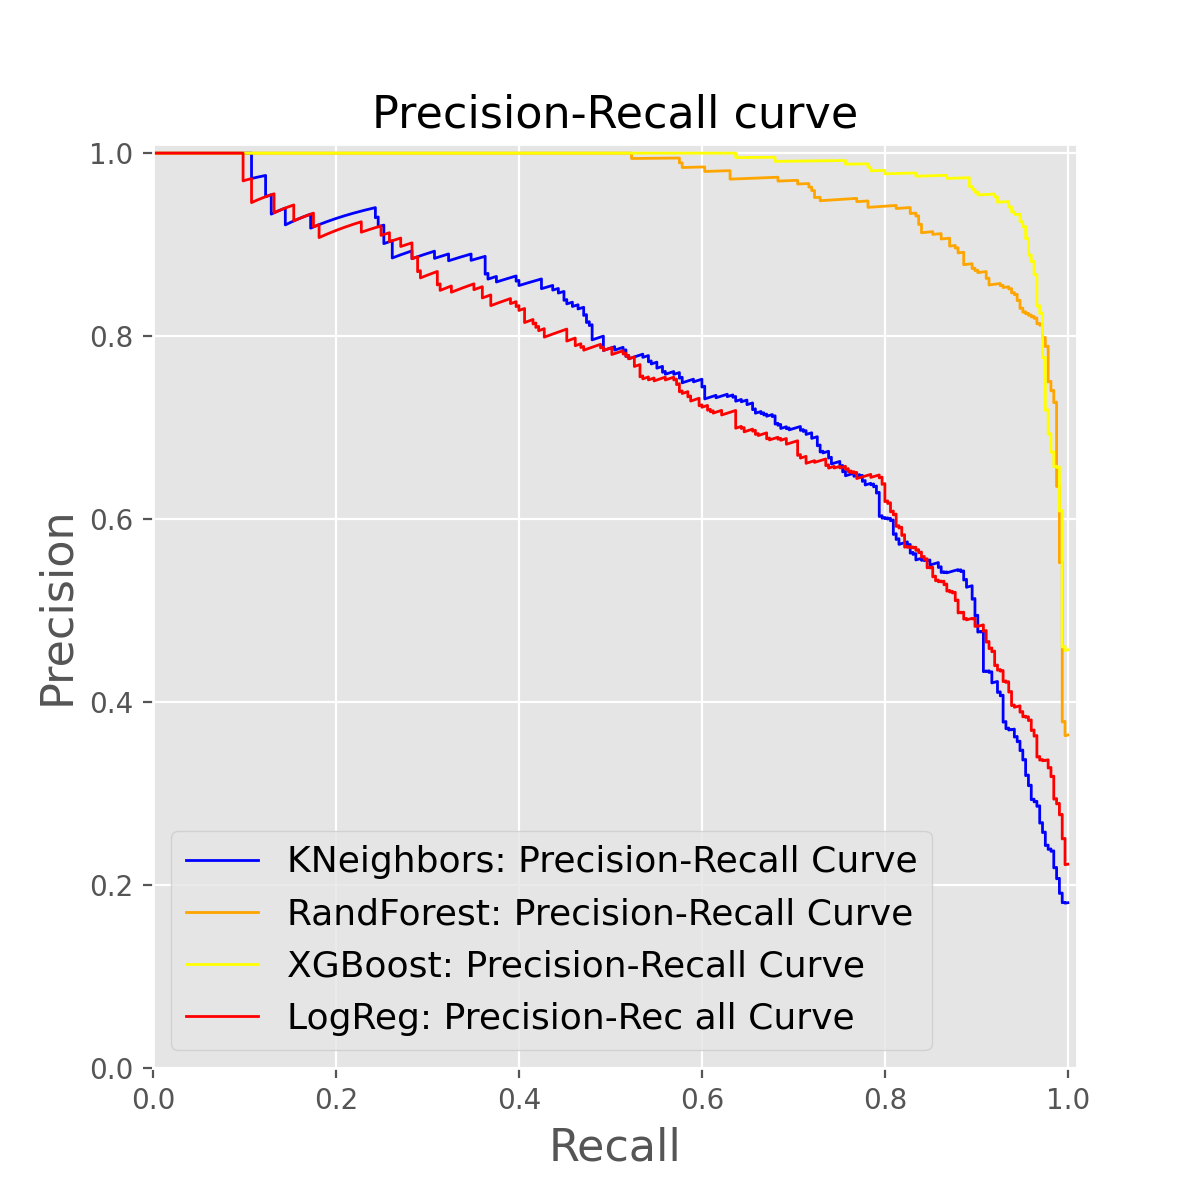

In [53]:
knn_precision, knn_recall, knn_thresholds = precision_recall_curve(y_test, y_proba_knn[:,1])
rfc_precision, rfc_recall, rfc_thresholds = precision_recall_curve(y_test, y_proba_rfc[:,1])
xgb_precision, xgb_recall, xgb_thresholds = precision_recall_curve(y_test, y_proba_xgb[:,1])
log_precision, log_recall, log_thresholds = precision_recall_curve(y_test, y_scores_log)

plt.figure(figsize=(6,6))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(knn_recall, knn_precision, lw=1, label='KNeighbors: Precision-Recall Curve', color='blue')
plt.plot(rfc_recall, rfc_precision, lw=1, label='RandForest: Precision-Recall Curve', color='orange')
plt.plot(xgb_recall, xgb_precision, lw=1, label='XGBoost: Precision-Recall Curve', color='yellow')
plt.plot(log_recall , log_precision, lw=1,  label='LogReg: Precision-Rec all Curve', color='red')
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('Precision-Recall curve', fontsize=16)
plt.legend(loc='lower left', fontsize=13)
plt.axes().set_aspect('equal')
plt.show();

## 7. Considerations for Improvement <a id='fut'></a>

We propose some areas where the project can be improved:
* SMOTE:
    SMOTE is an algorithm that synthesises data to equalise the amount of class 0 and class 1 data in the dataset. This can fix the imbalanced dataset issue.
* Additional models:
    We have selected four of the many machine learning models available. It would be interesting to see the results of other models.
* Feature importance: With the knowledge of the feature importance, we can run the model on a dataset containing only the important features and compare the results.

## References <a id='ref'></a>
<a id="one"></a>1. "What is Credit Card Churning? - Experian," n.d. Accessed on: Apr. 8, 2021. [Online]. Available: https://www.experian.com/blogs/ask-experian/what-is-credit-card-churning/ <br>
<a id="two"></a>2. "Revolving balance definition" n.d. Accessed on: Apr. 9, 2021. [Online]. Available: https://www.creditcards.com/credit-card-news/glossary/term-revolving-balance/ <br>
<a id="three"></a>3. "Open-to-Buy Credit Card Processor NJ" n.d. Accessed on: Apr. 9, 2021. [Online]. Available: https://www.merchantservicesnewjersey.com/definitions/open-to-buy/ <br>
<a id="four"></a>4. J. Brownlee, "ROC Curves and Precision-Recall Curves for Imbalanced Classification" Jan. 6, 2020. Accessed on: Apr. 12, 2021. [Online]. Available: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/<br>
<a id="four"></a>5. A. Zheng, "How to Evaluate Machine Learning Models: Hyperparameter Tuning" May 27, 2015. Accessed on: Apr. 12, 2021. [Online]. Available: https://web.archive.org/web/20160701182750/http://blog.dato.com/how-to-evaluate-machine-learning-models-part-4-hyperparameter-tuning